**Problem Statement**

The market for logistics analytics is expected to develop at a CAGR of 17.3 percent from 2019 to 2024, more than doubling in size.

This data demonstrates how logistics organizations are understanding the advantages of being able to predict what will happen in the future with a decent degree of certainty. 

Logistics leaders may use this data to address supply chain difficulties, cut costs, and enhance service levels all at the same time.

**Approach**

The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Trying out different machine
learning algorithms that’s best fit for the above case.

**Dataset Link**

https://www.kaggle.com/datasets/divyeshardeshana/supply-chain-shipment-pricing-data/code

**Main Aim**

The main goal is to predict the consignment pricing based on the available factors in the
dataset.

*Importing Libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

*Reading the csv data file*

In [3]:
df = pd.read_csv(r"C:\Users\Nirbhay\Downloads\SCMS_Delivery_History_Dataset.csv")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

*The head and tail of the dataset*

In [5]:
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                2-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured                1-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                 2-Jun-06               2-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                 1-Sep-06               1-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo Pharma Limited   
2           HIV test                               Abbott GmbH & Co. KG   
3              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4              Adult                           Aurobindo Pharma Limited   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand   Dosage  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal      NaN   
1                                Nevirapine    Generic  10mg/ml   
2       HIV 1/2, Determine Complete HIV Kit  Determine      NaN   
3                                Lamivudine    Generic    150mg   
4                                 Stavudine    Generic     30mg   

       Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0         Test kit                          30                  19   
1  Oral suspension                         240                1000   
2         Test kit                         100                 500   
3           Tablet                          60               31920   
4          Capsule                          60               38000   

   Line Item Value  Pack Price  Unit Price             Manufacturing Site  \
0            551.0       29.00        0.97     Ranbaxy Fine Chemicals LTD   
1           6200.0        6.20        0.03      Aurobindo Unit III, India   
2          40000.0       80.00        0.80  ABBVIE GmbH & Co.KG Wiesbaden   
3         127360.8        3.99        0.07  Ranbaxy, Paonta Shahib, India   
4         121600.0        3.20        0.05      Aurobindo Unit III, India   

  First Line Designation Weight (Kilograms) Freight Cost (USD)  \
0                    Yes                 13             780.34   
1                    Yes                358             4521.5   
2                    Yes                171   

In [6]:
df.tail()

ID Project Code       PQ # PO / SO # ASN/DN #        Country  \
10319  86818   103-ZW-T30  FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30  FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30  FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30  FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30  FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By Fulfill Via Vendor INCO Term Shipment Mode  \
10319   PMO - US    From RDC   N/A - From RDC         Truck   
10320   PMO - US    From RDC   N/A - From RDC         Truck   
10321   PMO - US    From RDC   N/A - From RDC         Truck   
10322   PMO - US    From RDC   N/A - From RDC         Truck   
10323   PMO - US    From RDC   N/A - From RDC         Truck   

      PQ First Sent to Client Date PO Sent to Vendor Date  \
10319                     10/16/14         N/A - From RDC   
10320                     10/24/14         N/A - From RDC   
10321                      8/12/14         N/A - From RDC   
10322                       7/1/15         N/A - From RDC   
10323                     10/16/14         N/A - From RDC   

      Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
10319               31-Jul-15                15-Jul-15              20-Jul-15   
10320               31-Jul-15                 6-Aug-15               7-Aug-15   
10321               31-Aug-15                25-Aug-15               3-Sep-15   
10322                9-Sep-15                 4-Aug-15              11-Aug-15   
10323               31-Aug-15                 4-Aug-15              11-Aug-15   

      Product Group Sub Classification         Vendor  \
10319           ARV          Pediatric  SCMS from RDC   
10320           ARV              Adult  SCMS from RDC   
10321           ARV              Adult  SCMS from RDC   
10322           ARV              Adult  SCMS from RDC   
10323           ARV          Pediatric  SCMS from RDC   

                                        Item Description  \
10319  Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...   
10320  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
10321  Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...   
10322  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
10323  Lamivudine/Zidovudine 30/60mg, dispersible tab...   

                                      Molecule/Test Type    Brand  \
10319                   Lamivudine/Nevirapine/Zidovudine  Generic   
10320                              Lamivudine/Zidovudine  Generic   
10321  Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...  Generic   
10322                              Lamivudine/Zidovudine  Generic   
10323                              Lamivudine/Zidovudine  Generic   

              Dosage                        Dosage Form  \
10319     30/50/60mg  Chewable/dispersible tablet - FDC   
10320      150/300mg                       Tablet - FDC   
10321  600/300/300mg                       Tablet - FDC   
10322      150/300mg                       Tablet - FDC   
10323        30/60mg  Chewable/dispersible tablet - FDC   

       Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
10319                          60              166571        599655.60   
10320                          60               21072        137389.44   
10321                          30              514526       5140114.74   
10322                          60               17465        113871.80   
10323                          60               36639         72911.61   

       Pack Price  Unit Price              Manufacturing Site  \
10319        3.60        0.06      Mylan,  H-12 & H-13, India   
10320        6.52        0.11    Hetero Unit III Hyderabad IN   
10321        9.99        0.33   Cipla Ltd A-42 MIDC Mahar. IN   
10322        6.52        0.11  Mylan (formerly Matrix) Nashik   
10323        1.99        0.03               Cipla, Goa, India   

      First Line Desig

*Shape of Dataset*

In [7]:
print(f"Total No of Rows: {df.shape[0]} and Columns: {df.shape[1]}")

Total No of Rows: 10324 and Columns: 33


*Info of the dataset*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

*Checking the unique values*

In [9]:
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

*Checking the null values*

In [10]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [11]:
missing_values= pd.DataFrame(df[["Shipment Mode","Dosage","Line Item Insurance (USD)"]])

In [12]:
missing_values.head()

Shipment Mode   Dosage  Line Item Insurance (USD)
0           Air      NaN                        NaN
1           Air  10mg/ml                        NaN
2           Air      NaN                        NaN
3           Air    150mg                        NaN
4           Air     30mg                        NaN

*Calculating percentage of missing values in ech column*

In [13]:
percent = missing_values.isnull().sum()/len(df)*100
print("Percentage of missing values in columns :\n",percent)

Percentage of missing values in columns :
 Shipment Mode                 3.487021
Dosage                       16.815188
Line Item Insurance (USD)     2.779930
dtype: float64


<AxesSubplot: >

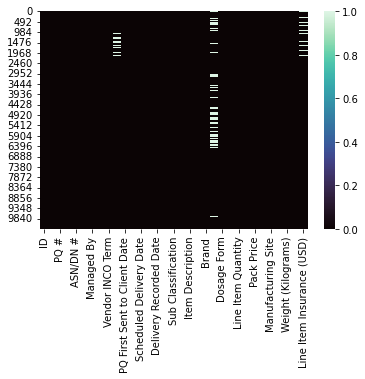

In [14]:
sns.heatmap(df.isnull(), cmap ="mako")

*Checking for Duplicates in the dataset*

In [15]:
df.duplicated().sum()

0

In [16]:
# statasic analysis
df.describe().T

count           mean            std  min  \
ID                          10324.0   51098.968229   31944.332496  1.0   
Unit of Measure (Per Pack)  10324.0      77.990895      76.579764  1.0   
Line Item Quantity          10324.0   18332.534870   40035.302961  1.0   
Line Item Value             10324.0  157650.567347  345292.066979  0.0   
Pack Price                  10324.0      21.910241      45.609223  0.0   
Unit Price                  10324.0       0.611701       3.275808  0.0   
Line Item Insurance (USD)   10037.0     240.117626     500.190568  0.0   

                                   25%        50%          75%         max  
ID                          12795.7500  57540.500   83648.2500    86823.00  
Unit of Measure (Per Pack)     30.0000     60.000      90.0000     1000.00  
Line Item Quantity            408.0000   3000.000   17039.7500   619999.00  
Line Item Value              4314.5925  30471.465  166447.1400  5951990.40  
Pack Price                      4.1200      9.300      23.5925     1345.64  
Unit Price                      0.0800      0.160       0.4700      238.65  
Line Item Insurance (USD)       6.5100     47.040     252.4000     7708.44

In [17]:
df.describe(include=object).T

count unique  \
Project Code                  10324    142   
PQ #                          10324   1237   
PO / SO #                     10324   6233   
ASN/DN #                      10324   7030   
Country                       10324     43   
Managed By                    10324      4   
Fulfill Via                   10324      2   
Vendor INCO Term              10324      8   
Shipment Mode                  9964      4   
PQ First Sent to Client Date  10324    765   
PO Sent to Vendor Date        10324    897   
Scheduled Delivery Date       10324   2006   
Delivered to Client Date      10324   2093   
Delivery Recorded Date        10324   2042   
Product Group                 10324      5   
Sub Classification            10324      6   
Vendor                        10324     73   
Item Description              10324    184   
Molecule/Test Type            10324     86   
Brand                         10324     48   
Dosage                         8588     54   
Dosage Form                   10324     17   
Manufacturing Site            10324     88   
First Line Designation        10324      2   
Weight (Kilograms)            10324   4688   
Freight Cost (USD)            10324   6733   

                                                             top   freq  
Project Code                                          116-ZA-T30    768  
PQ #                                              Pre-PQ Process   2681  
PO / SO #                                            SCMS-199289     67  
ASN/DN #                                               ASN-19166     54  
Country                                             South Africa   1406  
Managed By                                              PMO - US  10265  
Fulfill Via                                             From RDC   5404  
Vendor INCO Term                                  N/A - From RDC   5404  
Shipment Mode                                                Air   6113  
PQ First Sent to Client Date                      Pre-PQ Process   2476  
PO Sent to Vendor Date                            N/A - From RDC   5404  
Scheduled Delivery Date                                29-Aug-14     97  
Delivered to Client Date                               29-Aug-14     74  
Delivery Recorded Date                                 29-Aug-14     67  
Product Group                                                ARV   8550  
Sub Classification                                         Adult   6595  
Vendor                                             SCMS from RDC   5404  
Item Description               Efavirenz 600mg, tablets, 30 Tabs    755  
Molecule/Test Type                                     Efavirenz   1125  
Brand                                                    Generic   7285  
Dosage                                                     300mg    990  
Dosage Form                                               Tablet   3532  
Manufacturing Site                     Aurobindo Unit III, India   3172  
First Line Designation                                       Yes   7030  
Weight (Kilograms)                    Weight Captured Separately   1507  
Freight Cost (USD)            Freight Included in Commodity Cost   1442

In [18]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [19]:
# Changing column names to lower case and removing unwanted spaces 
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [20]:
#Convering dates into datetime format. For 'PQ First Sent to Client Data
dt = ['pq_first_sent_to_client_date' ,'po_sent_to_vendor_date','scheduled_delivery_date','delivered_to_client_date', 'delivery_recorded_date']
for col in dt:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')

**EDA**

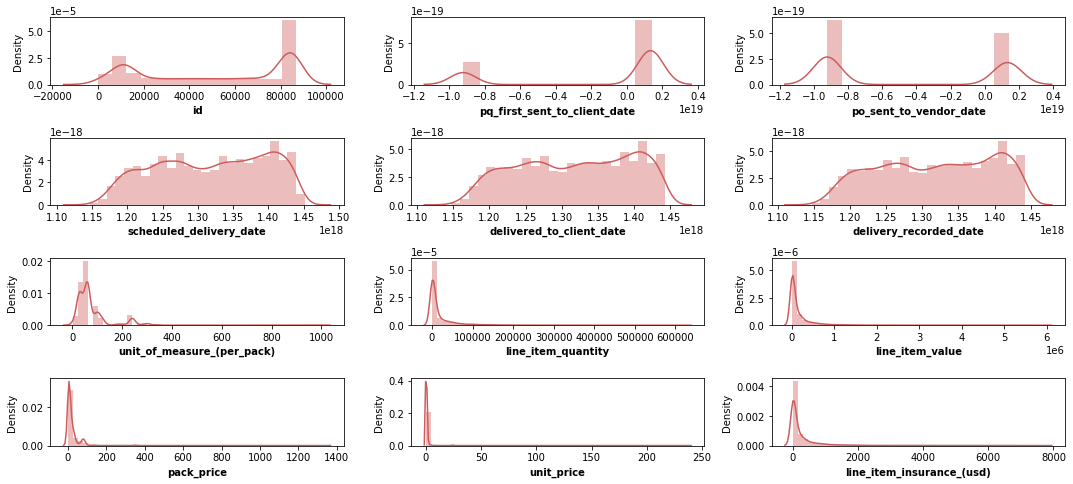

In [21]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

Report

As per the above plot most of the features are not normally distributed.

Interpreting each and every column is necessary as this is consignmennt data.

In [22]:
# Dictionaries with ID as keys and weight/freight as values
id_weight = dict(zip(df['id'],df['weight_(kilograms)']))
id_freight = dict(zip(df['id'],df['freight_cost_(usd)']))

In [23]:
# Functions to get weight and freight from corresponding ID numbers

def get_weight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_weight.get(int(e))
        except:
            return (data)
    else:
        return (data)

def get_freight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_freight.get(int(e))
        except:
            return (data)
    else:
        return (data)

In [24]:
# analysis of traget columns : freight_cost_(usd)
# total no of different values
#df['freight_cost_(usd)'].value_counts()

In [25]:
# Tackling Weight & Freight missing values
df['freight_cost_(usd)'] = df['freight_cost_(usd)'].replace('Freight Included in Commodity Cost',0)

In [26]:
df['weight_(kilograms)'] = df['weight_(kilograms)'].apply(get_weight)
df['freight_cost_(usd)'] = df['freight_cost_(usd)'].apply(get_freight)

In [27]:
df['weight_(kilograms)'] = pd.to_numeric(df['weight_(kilograms)'], errors = 'coerce')
df['freight_cost_(usd)'] = pd.to_numeric(df['freight_cost_(usd)'], errors = 'coerce')

In [28]:
df['weight_(kilograms)'] = df['weight_(kilograms)'].fillna(df['weight_(kilograms)'].mean())
df['freight_cost_(usd)'] = df['freight_cost_(usd)'].fillna(df['freight_cost_(usd)'].mean())

In [29]:
df['freight_cost_(usd)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10324 entries, 0 to 10323
Series name: freight_cost_(usd)
Non-Null Count  Dtype  
--------------  -----  
10324 non-null  float64
dtypes: float64(1)
memory usage: 80.8 KB


In [30]:
df['weight_(kilograms)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10324 entries, 0 to 10323
Series name: weight_(kilograms)
Non-Null Count  Dtype  
--------------  -----  
10324 non-null  float64
dtypes: float64(1)
memory usage: 80.8 KB


In [31]:
df['dosage'].isnull().values.any()

True

In [32]:
df['dosage'].isnull().sum()

1736

In [33]:
# Replace NAN with mode in Dosage column
df['dosage'] = df['dosage'].fillna(df['dosage'].mode()[0])

In [34]:
df['dosage'].isnull().values.any()

False

In [35]:
df['shipment_mode'].isnull().values.any()

True

In [36]:
# Drop rows with no shipment mode
missing_shipment = df[df['shipment_mode'].isna()].index
df = df.drop(missing_shipment, axis=0).reset_index(drop= True)

In [37]:
# Fill Insurance with percentage value of line item value
perc = df['line_item_insurance_(usd)'].sum() / df['line_item_value'][df['line_item_insurance_(usd)'] >= 0].sum()
df['line_item_insurance_(usd)'] = df['line_item_insurance_(usd)'].fillna(round(df['line_item_value']*perc, 2))

In [38]:
# Fill PO & PQ dates
#Calculate Average days between Price Quote-->Purchase Order--> Scheduled Delivery
pq_del_days = round((df['scheduled_delivery_date'] - df['pq_first_sent_to_client_date']).dt.days.mean(),0)
pq_po_days = round((df['po_sent_to_vendor_date'] - df['pq_first_sent_to_client_date']).dt.days.mean(),0)
po_del_days = round((df['scheduled_delivery_date'] - df['po_sent_to_vendor_date']).dt.days.mean(),0)
print (pq_del_days)
print (pq_po_days)
print (po_del_days)

172.0
54.0
106.0


In [39]:
# Assigning estimated dates of Price Quotation and Purchase Order
from datetime import date, timedelta
df['pq_first_sent_to_client_date'] = df['pq_first_sent_to_client_date'].fillna(df['scheduled_delivery_date'] - timedelta(days=pq_del_days))
df['po_sent_to_vendor_date'] = df['po_sent_to_vendor_date'].fillna(df['scheduled_delivery_date'] - timedelta(days=po_del_days))

In [40]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='r', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='b'))
    plt.show();

Description of id
------------------------------------------------------------------------
count     9964.000000
mean     52559.188679
std      31558.205236
min          1.000000
25%      15810.750000
50%      61097.500000
75%      83766.250000
max      86823.000000
Name: id, dtype: float64

 Skewness of id
------------------------------------------------------------------------
-0.3096

 Histogram and Boxplot of id
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


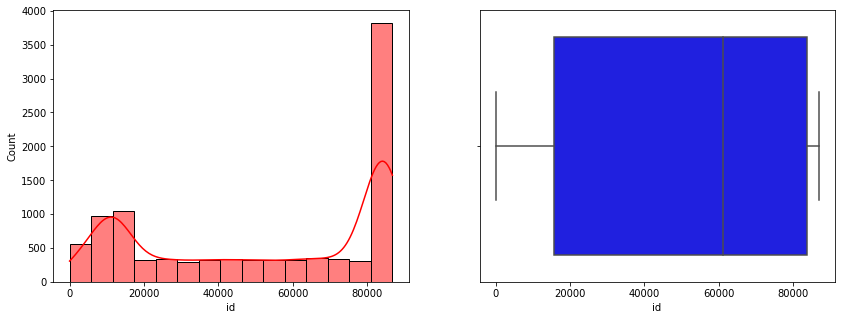

None
Description of unit_of_measure_(per_pack)
------------------------------------------------------------------------
count    9964.000000
mean       77.425733
std        76.393988
min         1.000000
25%        30.000000
50%        60.000000
75%        90.000000
max      1000.000000
Name: unit_of_measure_(per_pack), dtype: float64

 Skewness of unit_of_measure_(per_pack)
------------------------------------------------------------------------
4.4294

 Histogram and Boxplot of unit_of_measure_(per_pack)
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


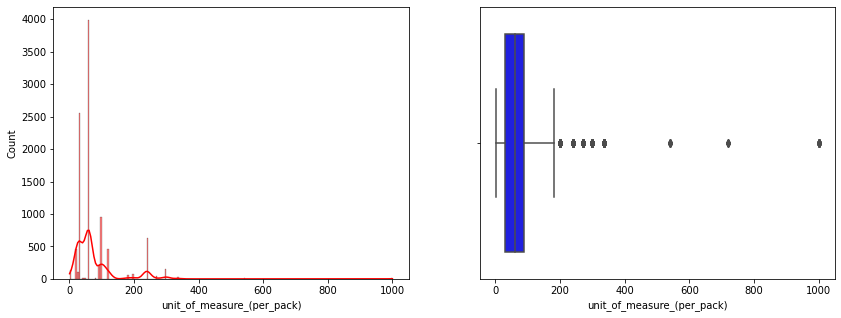

None
Description of line_item_quantity
------------------------------------------------------------------------
count      9964.000000
mean      18612.925632
std       40572.830601
min           1.000000
25%         405.000000
50%        3035.000000
75%       17441.750000
max      619999.000000
Name: line_item_quantity, dtype: float64

 Skewness of line_item_quantity
------------------------------------------------------------------------
4.9919

 Histogram and Boxplot of line_item_quantity
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


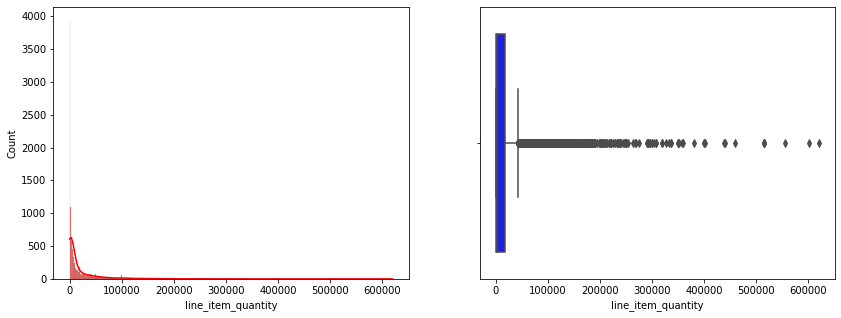

None
Description of line_item_value
------------------------------------------------------------------------
count    9.964000e+03
mean     1.592953e+05
std      3.493419e+05
min      0.000000e+00
25%      4.272032e+03
50%      3.042884e+04
75%      1.686673e+05
max      5.951990e+06
Name: line_item_value, dtype: float64

 Skewness of line_item_value
------------------------------------------------------------------------
5.8105

 Histogram and Boxplot of line_item_value
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


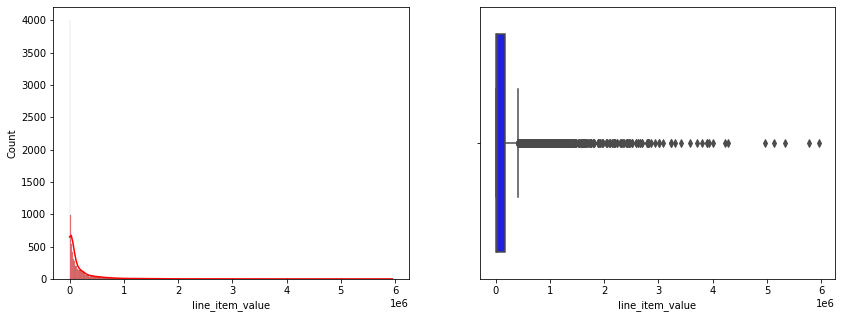

None
Description of pack_price
------------------------------------------------------------------------
count    9964.000000
mean       21.734272
std        45.710003
min         0.000000
25%         4.120000
50%         8.970000
75%        23.260000
max      1345.640000
Name: pack_price, dtype: float64

 Skewness of pack_price
------------------------------------------------------------------------
13.2143

 Histogram and Boxplot of pack_price
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


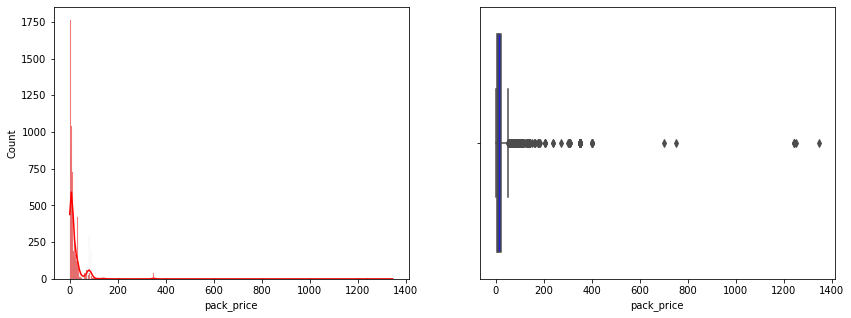

None
Description of unit_price
------------------------------------------------------------------------
count    9964.000000
mean        0.590277
std         2.292690
min         0.000000
25%         0.080000
50%         0.160000
75%         0.460000
max        41.680000
Name: unit_price, dtype: float64

 Skewness of unit_price
------------------------------------------------------------------------
9.8741

 Histogram and Boxplot of unit_price
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


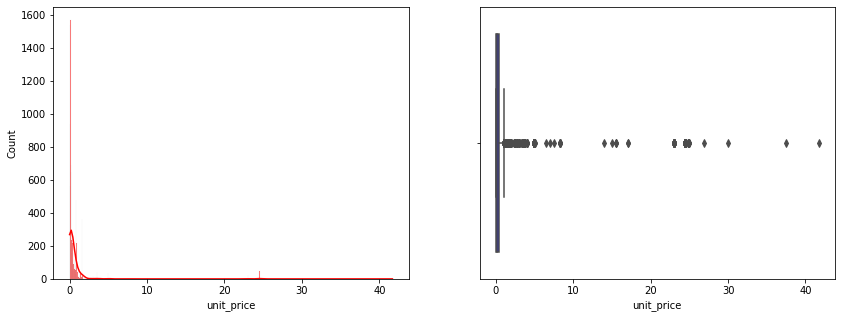

None
Description of weight_(kilograms)
------------------------------------------------------------------------
count      9964.000000
mean       4508.207782
std       12434.774299
min           0.000000
25%         404.000000
50%        2156.000000
75%        4464.293407
max      857354.000000
Name: weight_(kilograms), dtype: float64

 Skewness of weight_(kilograms)
------------------------------------------------------------------------
35.8107

 Histogram and Boxplot of weight_(kilograms)
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


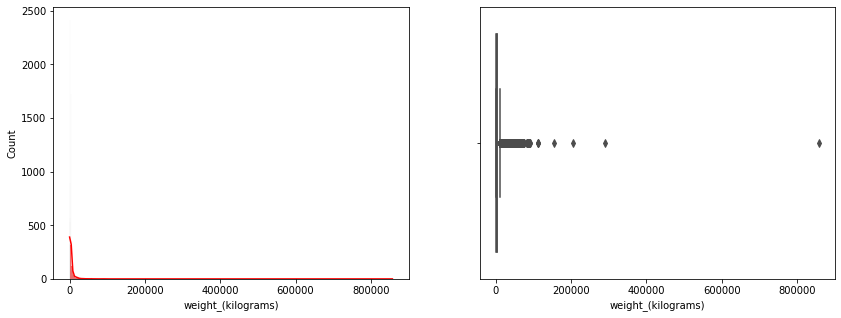

None
Description of freight_cost_(usd)
------------------------------------------------------------------------
count      9964.000000
mean      10897.637729
std       17130.306717
min           0.000000
25%        1374.732500
50%        5530.110000
75%       13290.310000
max      289653.200000
Name: freight_cost_(usd), dtype: float64

 Skewness of freight_cost_(usd)
------------------------------------------------------------------------
4.4537

 Histogram and Boxplot of freight_cost_(usd)
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


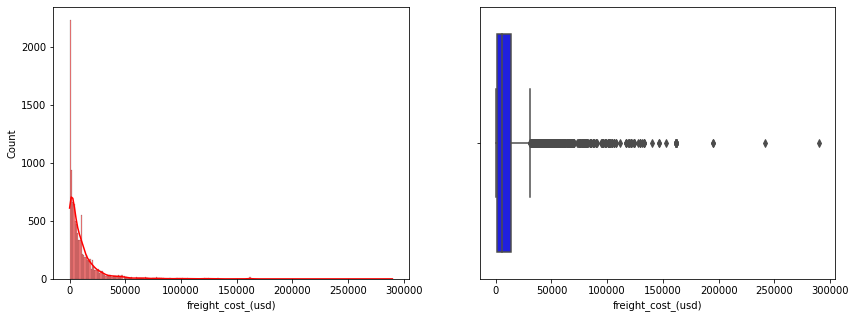

None
Description of line_item_insurance_(usd)
------------------------------------------------------------------------
count    9964.000000
mean      239.313809
std       500.186015
min         0.000000
25%         6.530000
50%        46.960000
75%       251.730000
max      7708.440000
Name: line_item_insurance_(usd), dtype: float64

 Skewness of line_item_insurance_(usd)
------------------------------------------------------------------------
4.8511

 Histogram and Boxplot of line_item_insurance_(usd)
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


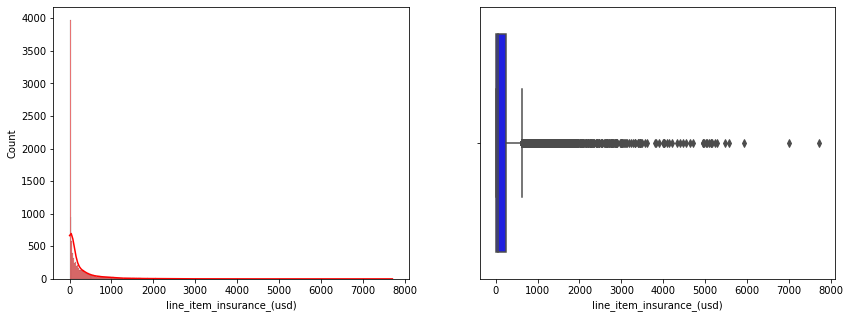

None


In [41]:
for column in df.columns:
    if df[column].dtype != 'object' and (df[column].dtype != 'datetime64[ns]'):
        print(univariateAnalysis_numeric(column,60))

Observations

we can see outliers in each numeric column.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            9964 non-null   int64         
 1   project_code                  9964 non-null   object        
 2   pq_#                          9964 non-null   object        
 3   po_/_so_#                     9964 non-null   object        
 4   asn/dn_#                      9964 non-null   object        
 5   country                       9964 non-null   object        
 6   managed_by                    9964 non-null   object        
 7   fulfill_via                   9964 non-null   object        
 8   vendor_inco_term              9964 non-null   object        
 9   shipment_mode                 9964 non-null   object        
 10  pq_first_sent_to_client_date  9964 non-null   datetime64[ns]
 11  po_sent_to_vendor_date        

In [43]:
# Dropping some columns which are not helpful in Model Building
df.drop(["id","project_code","pq_#"],axis=1,inplace=True)

In [44]:
# Separating Numeric and object datatype data and storing them separately for analysis
obj_cols=[x for x in df.columns if df[x].dtypes=="O"]

num_cols=[y for y in df.columns if df[y].dtypes=="int64" or df[y].dtypes=="float64"]

In [45]:
obj_cols

['po_/_so_#',
 'asn/dn_#',
 'country',
 'managed_by',
 'fulfill_via',
 'vendor_inco_term',
 'shipment_mode',
 'product_group',
 'sub_classification',
 'vendor',
 'item_description',
 'molecule/test_type',
 'brand',
 'dosage',
 'dosage_form',
 'manufacturing_site',
 'first_line_designation']

In [46]:
num_cols

['unit_of_measure_(per_pack)',
 'line_item_quantity',
 'line_item_value',
 'pack_price',
 'unit_price',
 'weight_(kilograms)',
 'freight_cost_(usd)',
 'line_item_insurance_(usd)']

**Coloumn wise Anaslysis**

*1. po_/_so_#*

In [47]:
df['po_/_so_#'].head()

0     SCMS-4
1    SCMS-13
2    SCMS-20
3    SCMS-78
4    SCMS-81
Name: po_/_so_#, dtype: object

In [48]:
df['po_/_so_#'].tail()

9959    SO-50020
9960    SO-50102
9961    SO-49600
9962    SO-51680
9963    SO-50022
Name: po_/_so_#, dtype: object

Optimizing the coloumn values

Lets define a function that takes string as a i/p and returns new string after splitting the letters and numbers

In [49]:
def reorder(df):
    df_split=df.split("-")
    df_return=df_split[0]
    return df_return

In [50]:
df["po_/_so_#"]=df["po_/_so_#"].apply(reorder)

In [51]:
df["po_/_so_#"].value_counts()

SO      5092
SCMS    4871
DSCM       1
Name: po_/_so_#, dtype: int64

In [52]:
df["po_/_so_#"]=df["po_/_so_#"].replace('DSCM',"SO")

In [53]:
df["po_/_so_#"].value_counts()

SO      5093
SCMS    4871
Name: po_/_so_#, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

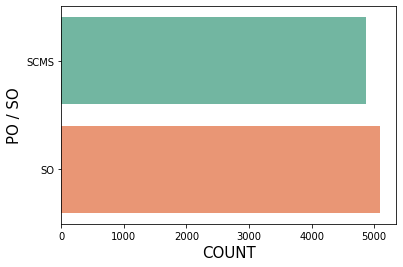

In [54]:
sns.countplot(df,y='po_/_so_#',palette='Set2')
plt.ylabel('PO / SO',size=15)
plt.xlabel('COUNT',size=15)
plt.show

*Observations*

Both the caegory of PO/SO are evenly present.

*2. asn/dn_#*

In [55]:
df["asn/dn_#"].head()

0     ASN-8
1    ASN-85
2    ASN-14
3    ASN-50
4    ASN-55
Name: asn/dn_#, dtype: object

In [56]:
df["asn/dn_#"].value_counts().head()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-30792    17
Name: asn/dn_#, dtype: int64

In [57]:
# Applying the Reorder function
df["asn/dn_#"]=df["asn/dn_#"].apply(reorder)
df["asn/dn_#"].value_counts()

DN     5092
ASN    4872
Name: asn/dn_#, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

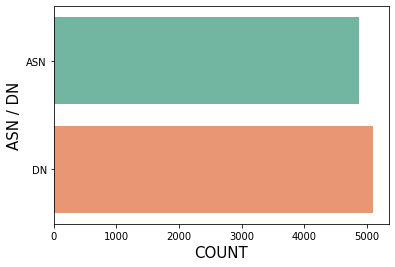

In [58]:
sns.countplot(df,y='asn/dn_#',palette='Set2')
plt.ylabel('ASN / DN',size=15)
plt.xlabel('COUNT',size=15)
plt.show

*Observations*

Both the caegory of ASN/DN are evenly present.

*3. Country*

In [59]:
df["country"].value_counts().head()

South Africa     1364
Nigeria          1158
Côte d'Ivoire     970
Uganda            771
Vietnam           688
Name: country, dtype: int64

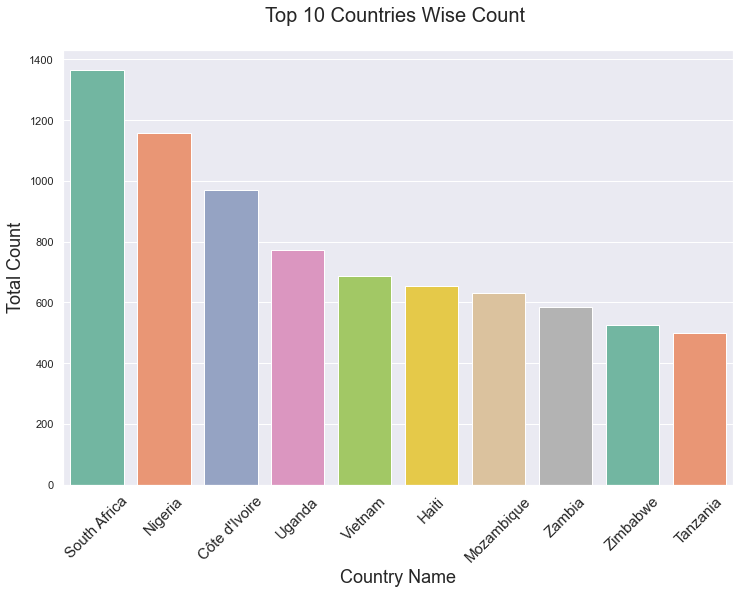

In [60]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.countplot(df,x ='country',order = df['country'].value_counts().nlargest(10).index,palette='Set2')
plt.title('Top 10 Countries Wise Count \n',fontsize=20)
plt.xticks(rotation = 45,size=15)
plt.ylabel('Total Count',fontsize=18)
plt.xlabel('Country Name',size=18)
plt.show()

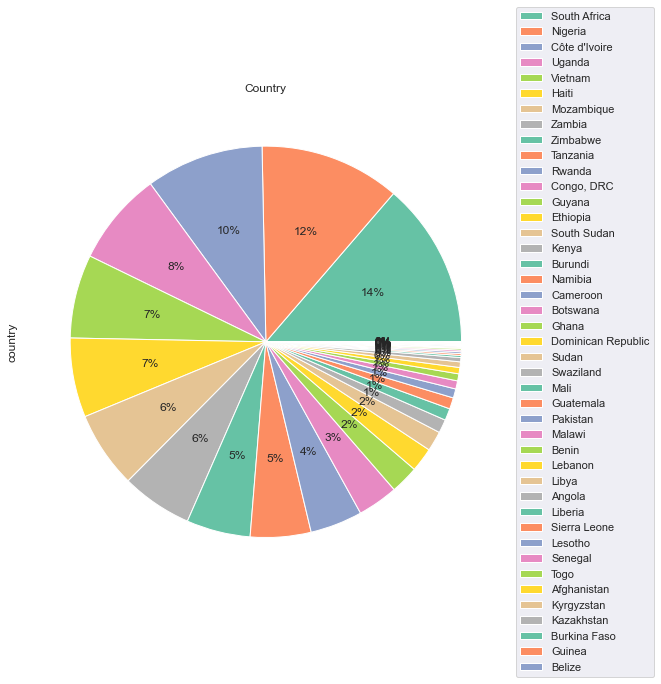

In [61]:
counts = df['country'].value_counts()
idx = counts[counts.lt(30)].index
colors = sns.color_palette('Set2')
df["country"].value_counts().plot.pie(title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations*

South Africa is the most preferred Destination country for the shipments followed by Nigeria , Côte d'Ivoire

*4. Managed By*

In [62]:
df["managed_by"].value_counts()

PMO - US                     9905
South Africa Field Office      57
Haiti Field Office              1
Ethiopia Field Office           1
Name: managed_by, dtype: int64

In [63]:
np.round(df["managed_by"].value_counts(normalize=True)*100,2)

PMO - US                     99.41
South Africa Field Office     0.57
Haiti Field Office            0.01
Ethiopia Field Office         0.01
Name: managed_by, dtype: float64

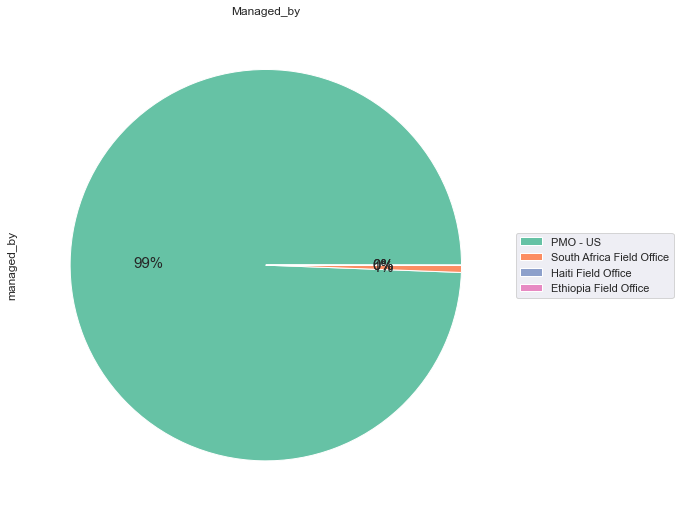

In [64]:
counts = df['managed_by'].value_counts()
idx = counts[counts.lt(30)].index
colors = sns.color_palette('Set2')
df["managed_by"].value_counts().plot.pie(title="Managed_by",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations*

Almost all the Management office ( 99.41% ) are located in US hence it does not provide any useful information so,we can drop it from our variables.

In [65]:
df.drop("managed_by",axis=1,inplace=True)

*5. Fulfill Via*

In [66]:
df["fulfill_via"].value_counts()

From RDC       5092
Direct Drop    4872
Name: fulfill_via, dtype: int64

In [67]:
np.round(df["fulfill_via"].value_counts(normalize=True)*100,2)

From RDC       51.1
Direct Drop    48.9
Name: fulfill_via, dtype: float64

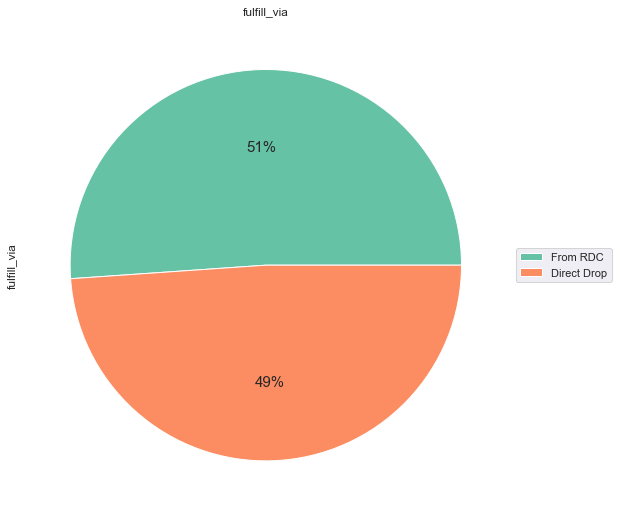

In [68]:
counts = df['fulfill_via'].value_counts()
colors = sns.color_palette('Set2')
df["fulfill_via"].value_counts().plot.pie(title="fulfill_via",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations*

51% of the orders are fulfilled by RDC whereas 49% of the orders are fulfilled by Direct Drop.

*6. Vendor Inco Term*

In [69]:
df["vendor_inco_term"].value_counts()

N/A - From RDC    5092
EXW               2778
DDP               1399
FCA                397
CIP                273
DDU                 14
DAP                  9
CIF                  2
Name: vendor_inco_term, dtype: int64

In [70]:
np.round(df["vendor_inco_term"].value_counts(normalize=True)*100,2)

N/A - From RDC    51.10
EXW               27.88
DDP               14.04
FCA                3.98
CIP                2.74
DDU                0.14
DAP                0.09
CIF                0.02
Name: vendor_inco_term, dtype: float64

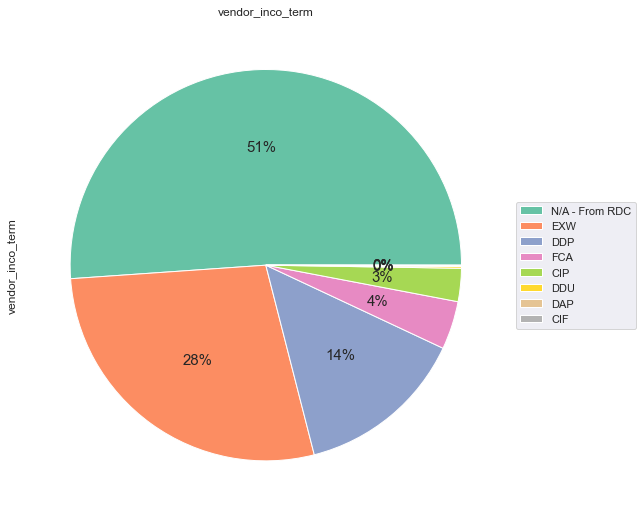

In [71]:
counts = df['vendor_inco_term'].value_counts()
colors = sns.color_palette('Set2')
df["vendor_inco_term"].value_counts().plot.pie(title="vendor_inco_term",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations*

Half of the Vendor Terms are from RDC, 28% from EXW, 14% from DDP and the rest are 7%.

*7. shipment Mode*

In [72]:
df["shipment_mode"].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: shipment_mode, dtype: int64

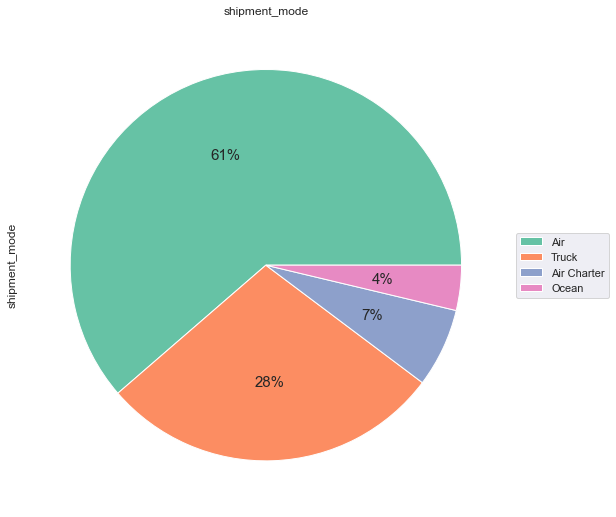

In [73]:
counts = df['shipment_mode'].value_counts()
colors = sns.color_palette('Set2')
df["shipment_mode"].value_counts().plot.pie(title="shipment_mode",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations*

Most of the shipment is done by Air and Truck.

*8. Product Group*

In [74]:
df["product_group"].value_counts()

ARV     8241
HRDT    1678
ANTM      22
ACT       16
MRDT       7
Name: product_group, dtype: int64

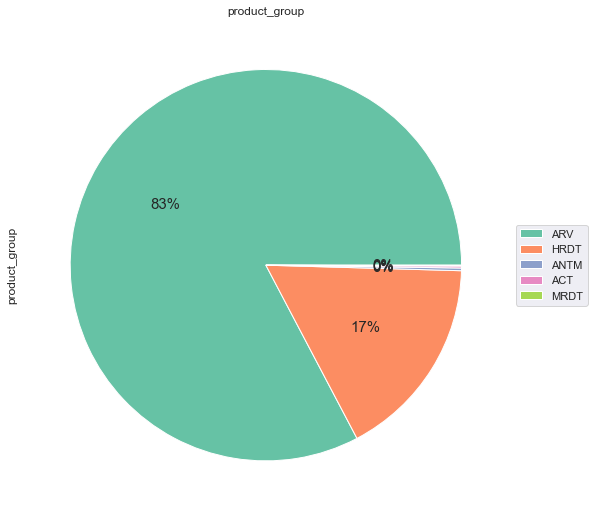

In [75]:
counts = df['product_group'].value_counts()
colors = sns.color_palette('Set2')
df["product_group"].value_counts().plot.pie(title="product_group",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations*

Most of the product group is ARV which contributed 83%.

Hence we can merge the rest of the product group to other category.


In [76]:
other_product=df["product_group"].value_counts().to_dict()
HRDT=[]
for key,val in other_product.items():
    if val<=2000:
        HRDT.append(key)

In [77]:
df["product_group"]=df["product_group"].replace(HRDT,"other")
df["product_group"].value_counts()

ARV      8241
other    1723
Name: product_group, dtype: int64

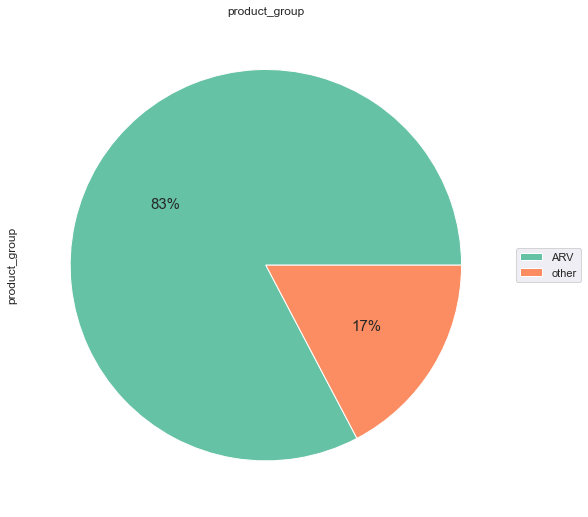

In [78]:
counts = df['product_group'].value_counts()
colors = sns.color_palette('Set2')
df["product_group"].value_counts().plot.pie(title="product_group",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*9. Sub Classification*

In [79]:
df["sub_classification"].value_counts()

Adult                   6356
Pediatric               1885
HIV test                1522
HIV test - Ancillary     156
Malaria                   29
ACT                       16
Name: sub_classification, dtype: int64

In [80]:
order= df['sub_classification'].value_counts().nlargest(10)

<function matplotlib.pyplot.show(close=None, block=None)>

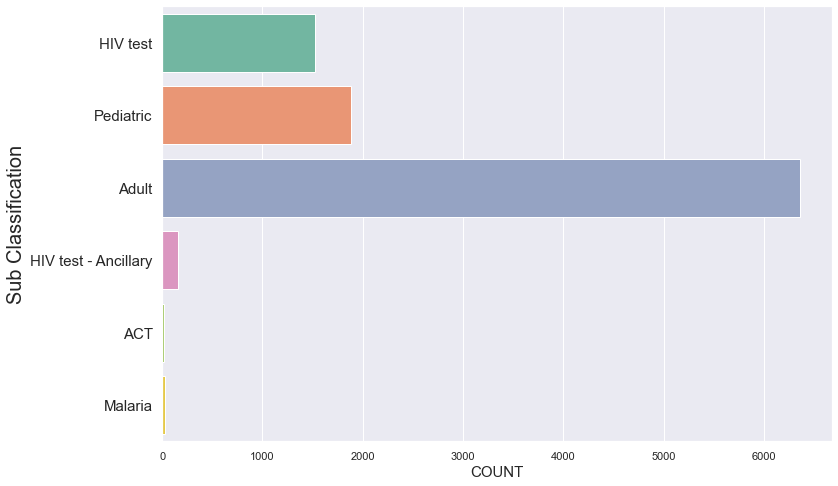

In [81]:
sns.countplot(df,y='sub_classification',palette='Set2')
plt.ylabel('Sub Classification',size=20)
plt.xlabel('COUNT',size=15)
plt.yticks(size=15)
plt.show

Here we can modify the values since most of them are classified into adult and pediatric

In [82]:
other_class=df["sub_classification"].value_counts().to_dict()
HIV_plus=[]
for key,val in other_class.items():
    if val<=1600:
        HIV_plus.append(key) 

In [83]:
df["sub_classification"]=df["sub_classification"].replace(HIV_plus,"HIV+")

In [84]:
df["sub_classification"].value_counts()

Adult        6356
Pediatric    1885
HIV+         1723
Name: sub_classification, dtype: int64

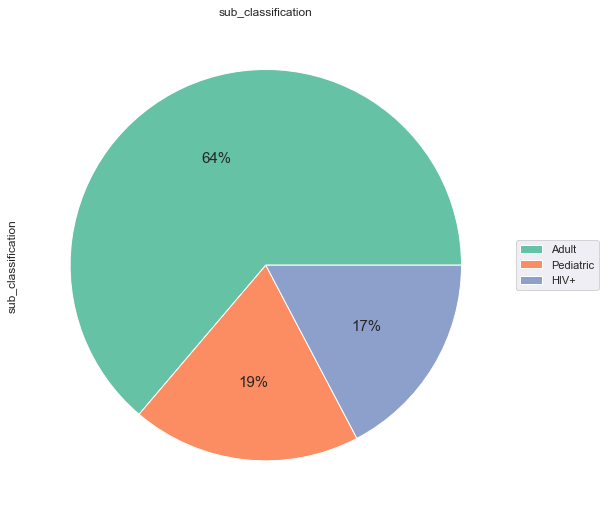

In [85]:
counts = df['sub_classification'].value_counts()
colors = sns.color_palette('Set2')
df["sub_classification"].value_counts().plot.pie(title="sub_classification",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations* 

Most of the them are classfied into Adult(64%), rest are pediatric and HIV+

*9. Vendor*

In [86]:
df["vendor"].value_counts().head()

SCMS from RDC               5092
Orgenics, Ltd                754
S. BUYS WHOLESALER           707
Aurobindo Pharma Limited     668
Trinity Biotech, Plc         356
Name: vendor, dtype: int64

In [87]:
np.round(df["vendor"].value_counts(normalize=True)*100,2).head()

SCMS from RDC               51.10
Orgenics, Ltd                7.57
S. BUYS WHOLESALER           7.10
Aurobindo Pharma Limited     6.70
Trinity Biotech, Plc         3.57
Name: vendor, dtype: float64

Here also we can merge rest of the values in other column as 51% is contributed by one major value

In [88]:
other_vendor=df["vendor"].value_counts().to_dict()
other_catv=[]
for key,val in other_vendor.items():
    if val<=5000:
        other_catv.append(key)  

In [89]:
df["vendor"]=df["vendor"].replace(other_catv,"other")

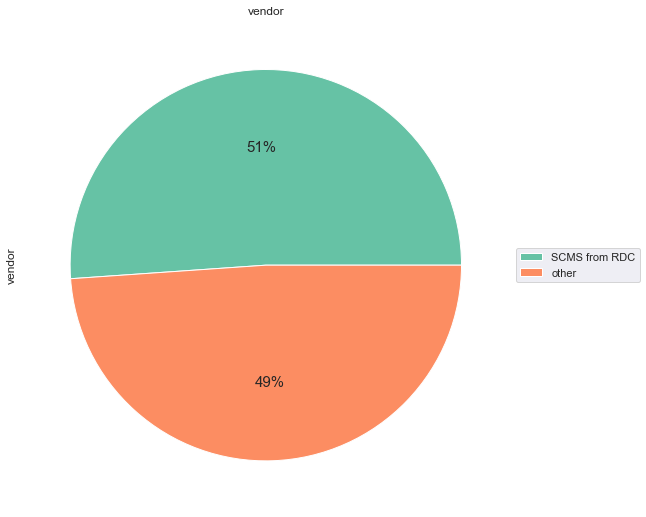

In [90]:
counts = df['vendor'].value_counts()
colors = sns.color_palette('Set2')
df["vendor"].value_counts().plot.pie(title="vendor",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations*

Half of the vendor is SCMS from RDC and half of them are others

*10. Item Description*

In [91]:
df["item_description"].value_counts().head()

Efavirenz 600mg, tablets, 30 Tabs                                   713
Nevirapine 200mg, tablets, 60 Tabs                                  607
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs    579
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                   569
HIV 1/2, Determine Complete HIV Kit, 100 Tests                      565
Name: item_description, dtype: int64

In [92]:
df["item_description"].value_counts().tail()

Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs    1
Malaria Antigen P.f Kit, 30 x 1 Test                                             1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml    1
Atazanavir 200mg, capsules, 60 Caps                                              1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                            1
Name: item_description, dtype: int64

*Observations*

It is not possible to classify item_description into different categories, hence dropping it 

In [93]:
df.drop("item_description",axis=1,inplace=True)

*11. molecule/test_type*

In [94]:
df["molecule/test_type"].value_counts().head()

Efavirenz                           1063
Nevirapine                           849
Lamivudine/Nevirapine/Zidovudine     706
Lamivudine/Zidovudine                661
Lopinavir/Ritonavir                  611
Name: molecule/test_type, dtype: int64

In [95]:
df["molecule/test_type"].value_counts().tail()

Lamivudine/Zidovudine+Abacavir      1
Primaquine base (as diphosphate)    1
Quinine (as sulfate)                1
HIV 1/2, Visitect Kit               1
Nelfinavir                          1
Name: molecule/test_type, dtype: int64

*Observations*

Here the column Molecule/Test Type gives information on test type and consituting molecules present in it. Hence dropping it.

In [96]:
df.drop("molecule/test_type",axis=1,inplace=True)

*11. Brand*

In [97]:
df["brand"].value_counts().head()

Generic      7072
Determine     783
Uni-Gold      366
Aluvia        238
Kaletra       155
Name: brand, dtype: int64

In [98]:
df["brand"].value_counts(normalize=True).head()

Generic      0.709755
Determine    0.078583
Uni-Gold     0.036732
Aluvia       0.023886
Kaletra      0.015556
Name: brand, dtype: float64

*Observations*

Here most of the brands are generic and rest of them are 29%.

Hence grouping them as generic and others

In [99]:
other_brand=df["brand"].value_counts().to_dict()
other_catb=[]
for key,val in other_brand.items():
    if val<=1000:
        other_catb.append(key)  

In [100]:
df["brand"]=df["brand"].replace(other_catb,"other")

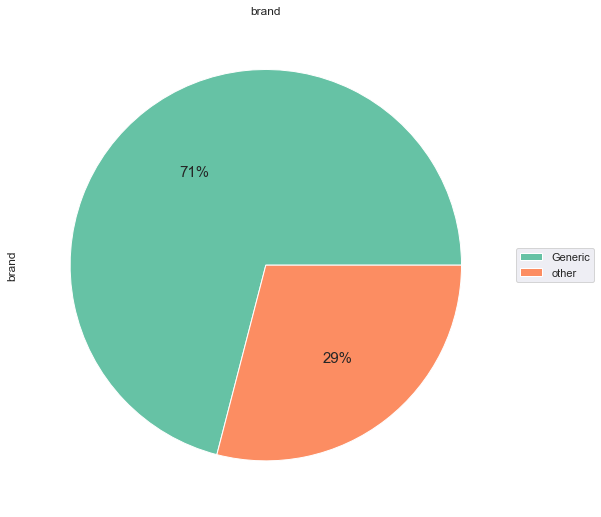

In [101]:
counts = df['brand'].value_counts()
colors = sns.color_palette('Set2')
df["brand"].value_counts().plot.pie(title="brand",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*12. Dosage*

In [102]:
df["dosage"].value_counts().head()

300mg            2640
200mg             896
600mg             728
150/300/200mg     579
150/300mg         572
Name: dosage, dtype: int64

In [103]:
df["dosage"].value_counts(normalize=True).head(20)

300mg            0.264954
200mg            0.089924
600mg            0.073063
150/300/200mg    0.058109
150/300mg        0.057407
10mg/ml          0.052690
150mg            0.041951
200/50mg         0.038438
300/300mg        0.030209
600/300/300mg    0.028703
150/200/30mg     0.023083
100mg            0.021979
50mg             0.016660
200/300mg        0.016058
80/20mg/ml       0.015155
400mg            0.014954
20mg/ml          0.014552
600/200/300mg    0.013950
30mg             0.013448
150/30mg         0.013047
Name: dosage, dtype: float64

*Observations*

It is not possible to classify dosage into different categories, hence dropping it 

In [104]:
df.drop("dosage",axis=1,inplace=True)

*13. Dosage Form*

In [105]:
df["dosage_form"].value_counts().head(10)

Tablet                               3406
Tablet - FDC                         2684
Test kit                             1529
Oral solution                         690
Capsule                               673
Chewable/dispersible tablet - FDC     239
Oral suspension                       205
Test kit - Ancillary                  156
Chewable/dispersible tablet           142
Delayed-release capsules              131
Name: dosage_form, dtype: int64

In [106]:
df["dosage_form"].value_counts(normalize=True).head(10)

Tablet                               0.341831
Tablet - FDC                         0.269370
Test kit                             0.153452
Oral solution                        0.069249
Capsule                              0.067543
Chewable/dispersible tablet - FDC    0.023986
Oral suspension                      0.020574
Test kit - Ancillary                 0.015656
Chewable/dispersible tablet          0.014251
Delayed-release capsules             0.013147
Name: dosage_form, dtype: float64

In [107]:
other_dosage_form=df["dosage_form"].value_counts().to_dict()
other_catb=[]
for key,val in other_dosage_form.items():
    if val<=700:
        other_catb.append(key)  

In [108]:
df["dosage_form"]=df["dosage_form"].replace(other_catb,"other")

In [109]:
df["dosage_form"].value_counts()

Tablet          3406
Tablet - FDC    2684
other           2345
Test kit        1529
Name: dosage_form, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

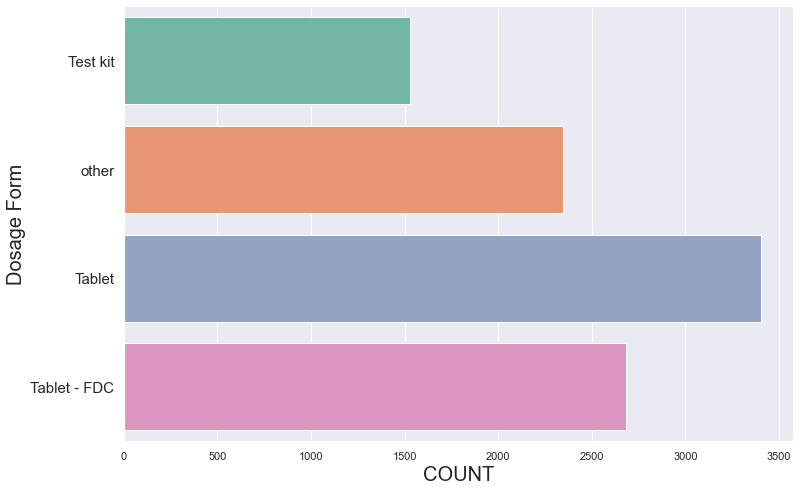

In [110]:
sns.countplot(df,y='dosage_form',palette='Set2')
plt.ylabel('Dosage Form',size=20)
plt.xlabel('COUNT',size=20)
plt.yticks(size=15)
plt.show

*Observations*

Most of the doasage are in the form of tablet.

*14. Manufacturing Site*

In [111]:
df["manufacturing_site"].value_counts().head()

Aurobindo Unit III, India         3031
Mylan (formerly Matrix) Nashik    1407
Hetero Unit III Hyderabad IN       868
Cipla, Goa, India                  634
Strides, Bangalore, India.         533
Name: manufacturing_site, dtype: int64

In [112]:
df["manufacturing_site"].value_counts(normalize=True).head(10)

Aurobindo Unit III, India         0.304195
Mylan (formerly Matrix) Nashik    0.141208
Hetero Unit III Hyderabad IN      0.087114
Cipla, Goa, India                 0.063629
Strides, Bangalore, India.        0.053493
Alere Medical Co., Ltd.           0.048274
Trinity Biotech, Plc              0.039643
ABBVIE Ludwigshafen Germany       0.035528
Inverness Japan                   0.033822
ABBVIE (Abbott) Logis. UK         0.020775
Name: manufacturing_site, dtype: float64

In [113]:
other_manufacture=df["manufacturing_site"].value_counts().to_dict()
other_cat=[]
for key,val in other_manufacture.items():
    if val<=500:
        other_cat.append(key)

In [114]:
df["manufacturing_site"]=df["manufacturing_site"].replace(other_cat,"other")

<function matplotlib.pyplot.show(close=None, block=None)>

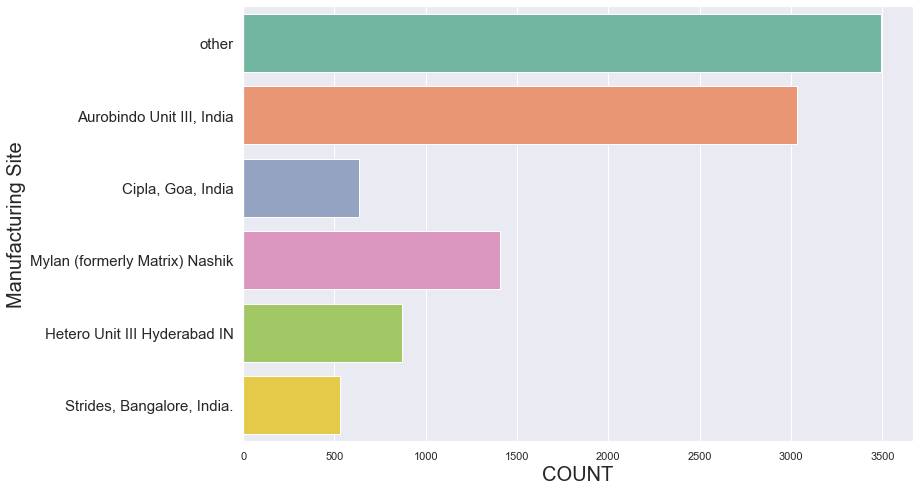

In [115]:
sns.countplot(df,y='manufacturing_site',palette='Set2')
plt.ylabel('Manufacturing Site',size=20)
plt.xlabel('COUNT',size=20)
plt.yticks(size=15)
plt.show

*15. First Line Designation*

In [116]:
df["first_line_designation"].value_counts().head()

Yes    6804
No     3160
Name: first_line_designation, dtype: int64

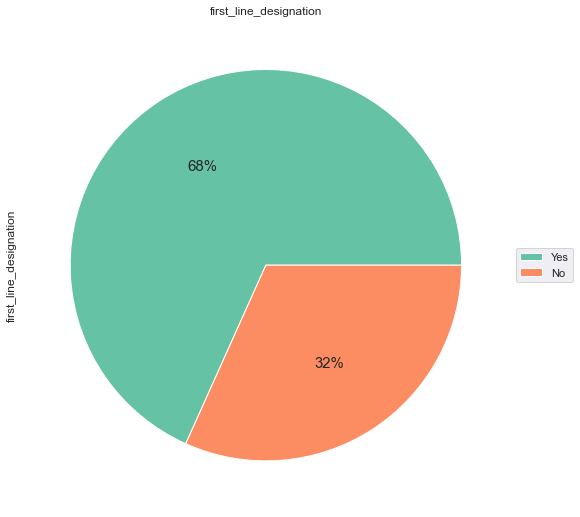

In [117]:
counts = df['first_line_designation'].value_counts()
colors = sns.color_palette('Set2')
df["first_line_designation"].value_counts().plot.pie(title="first_line_designation",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

*Observations*

most of them use first line designation (68%)

In [118]:
df.isna().sum()

po_/_so_#                       0
asn/dn_#                        0
country                         0
fulfill_via                     0
vendor_inco_term                0
shipment_mode                   0
pq_first_sent_to_client_date    0
po_sent_to_vendor_date          0
scheduled_delivery_date         0
delivered_to_client_date        0
delivery_recorded_date          0
product_group                   0
sub_classification              0
vendor                          0
brand                           0
dosage_form                     0
unit_of_measure_(per_pack)      0
line_item_quantity              0
line_item_value                 0
pack_price                      0
unit_price                      0
manufacturing_site              0
first_line_designation          0
weight_(kilograms)              0
freight_cost_(usd)              0
line_item_insurance_(usd)       0
dtype: int64

**Multivariate Analysis**

Text(0.5, 0, 'Country Name')

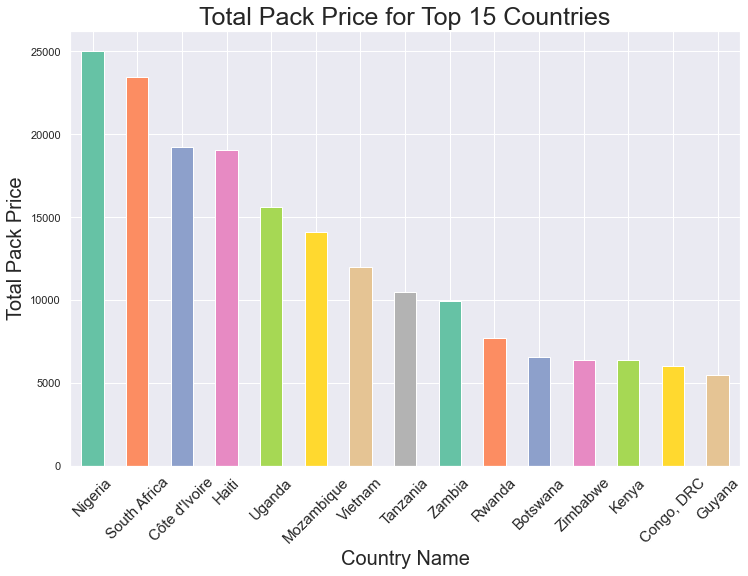

In [119]:
colors = sns.color_palette('Set2')
df.groupby(['country'])['pack_price'].sum().nlargest(15).plot(kind='bar',color=colors)
plt.title("Total Pack Price for Top 15 Countries",size=25)
plt.xticks(rotation = 45,size=15)
plt.ylabel('Total Pack Price',size=20)
plt.xlabel('Country Name',size=20)

*Observations*

The pack price for Nigeria is the highest followed by South Africa

In [120]:
import plotly.express as px
print("The sum of Generic Unit Price total is ", df[df['brand']=='Generic']['unit_price'].sum())
px.bar(df.groupby('brand')['unit_price'].count().sort_values(ascending=False), title='Count of Unit Prices wrt Brands',color_discrete_sequence =['aquamarine']*3)

The sum of Generic Unit Price total is  1241.2


*Observations*

We saw that most of the brands are generic and hence the count of total cost is greater for generic brands

In [121]:
px.bar(df.groupby('brand')['unit_price'].sum().sort_values(ascending = False), title='Sum of Unit Prices wrt Brands',color_discrete_sequence =['aquamarine']*3)

*Observations*

Here we have the answer that why most of the brands are generic because the cost of branded medical goods is higher compared to generic brands

In [122]:
px.bar(df.groupby('dosage_form')['pack_price'].sum().sort_values(ascending = False), title='Sum of Pack Prices wrt Vendor',color_discrete_sequence =['aquamarine']*3)

*Observations*

Test kits cost the most followed by tablets

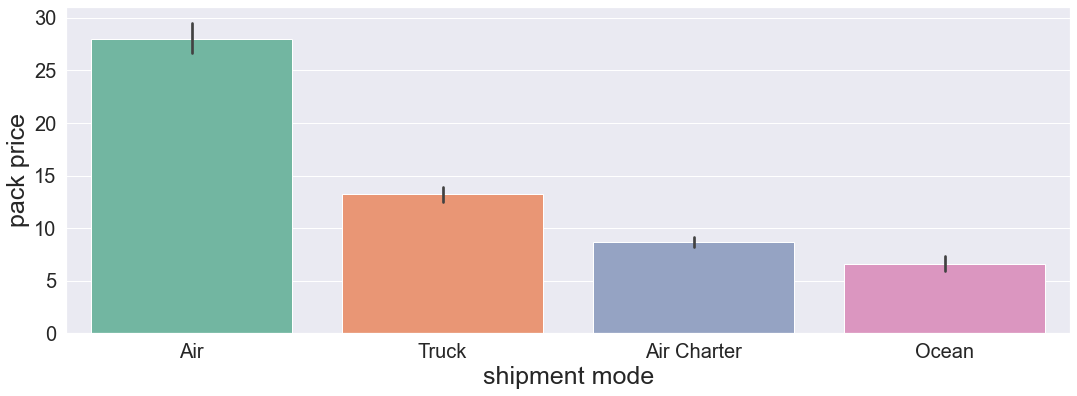

In [123]:
plt.subplots(figsize = (18,6))
colors = sns.color_palette('Set2')
plt.xticks(size=20)
plt.yticks(size=20)
sns.barplot(x='shipment_mode',y= 'pack_price', data = df,palette='Set2')
plt.xlabel("shipment mode",size=25)
plt.ylabel("pack price",size=25)
plt.show()

*Observations*

Air shipment will cost the most and ocean shipment will cost the least.

Description of freight_cost_(usd)
------------------------------------------------------------------------
count      9964.000000
mean      10897.637729
std       17130.306717
min           0.000000
25%        1374.732500
50%        5530.110000
75%       13290.310000
max      289653.200000
Name: freight_cost_(usd), dtype: float64

 Skewness of freight_cost_(usd)
------------------------------------------------------------------------
4.4537

 Histogram and Boxplot of freight_cost_(usd)
------------------------------------------------------------------------
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


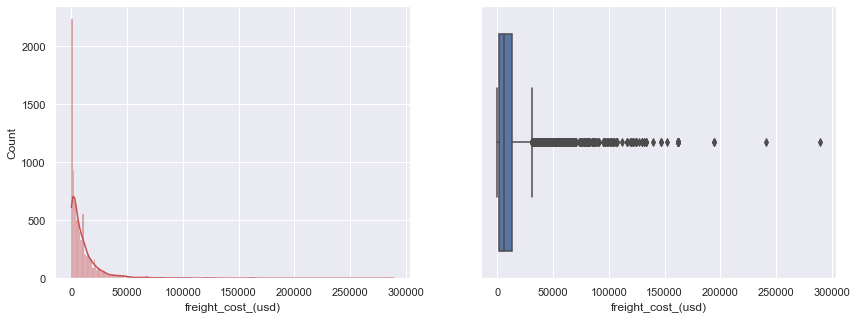

In [124]:
univariateAnalysis_numeric("freight_cost_(usd)",100)

In [125]:
#calculating total no of days to process the delivery
df["days_to_process"]=df["delivery_recorded_date"]-df["pq_first_sent_to_client_date"]
df["days_to_process"].head(5)

0   172 days
1   172 days
2   172 days
3   172 days
4   172 days
Name: days_to_process, dtype: timedelta64[ns]

In [126]:
df['days_to_process'] = df['days_to_process'].dt.days.astype('int64')

In [127]:
df.drop(["delivery_recorded_date","pq_first_sent_to_client_date","scheduled_delivery_date","delivered_to_client_date"],axis=1,inplace=True)
df.drop("po_sent_to_vendor_date",axis=1,inplace=True)

In [128]:
df.head()

po_/_so_# asn/dn_#        country  fulfill_via vendor_inco_term  \
0      SCMS      ASN  Côte d'Ivoire  Direct Drop              EXW   
1      SCMS      ASN        Vietnam  Direct Drop              EXW   
2      SCMS      ASN  Côte d'Ivoire  Direct Drop              FCA   
3      SCMS      ASN        Vietnam  Direct Drop              EXW   
4      SCMS      ASN        Vietnam  Direct Drop              EXW   

  shipment_mode product_group sub_classification vendor    brand dosage_form  \
0           Air         other               HIV+  other    other    Test kit   
1           Air           ARV          Pediatric  other  Generic       other   
2           Air         other               HIV+  other    other    Test kit   
3           Air           ARV              Adult  other  Generic      Tablet   
4           Air           ARV              Adult  other  Generic       other   

   unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   pack_price  unit_price         manufacturing_site first_line_designation  \
0       29.00        0.97                      other                    Yes   
1        6.20        0.03  Aurobindo Unit III, India                    Yes   
2       80.00        0.80                      other                    Yes   
3        3.99        0.07                      other                    Yes   
4        3.20        0.05  Aurobindo Unit III, India                    Yes   

   weight_(kilograms)  freight_cost_(usd)  line_item_insurance_(usd)  \
0                13.0              780.34                       0.83   
1               358.0             4521.50                       9.31   
2               171.0             1653.78                      60.09   
3              1855.0            16007.06                     191.34   
4              7590.0            45450.08                     182.68   

   days_to_process  
0              172  
1              172  
2              172  
3              172  
4              172

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   po_/_so_#                   9964 non-null   object 
 1   asn/dn_#                    9964 non-null   object 
 2   country                     9964 non-null   object 
 3   fulfill_via                 9964 non-null   object 
 4   vendor_inco_term            9964 non-null   object 
 5   shipment_mode               9964 non-null   object 
 6   product_group               9964 non-null   object 
 7   sub_classification          9964 non-null   object 
 8   vendor                      9964 non-null   object 
 9   brand                       9964 non-null   object 
 10  dosage_form                 9964 non-null   object 
 11  unit_of_measure_(per_pack)  9964 non-null   int64  
 12  line_item_quantity          9964 non-null   int64  
 13  line_item_value             9964 

**Analysis w.r.t to Target Variable**

In [130]:
def Analysis_target(column,nbins):

    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(40,10))
    
    print(sns.barplot(x=df[column],y=df["line_item_value"], color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column],y=df["line_item_value"],ax=axs[1],color='r'))
    
    plt.show();

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


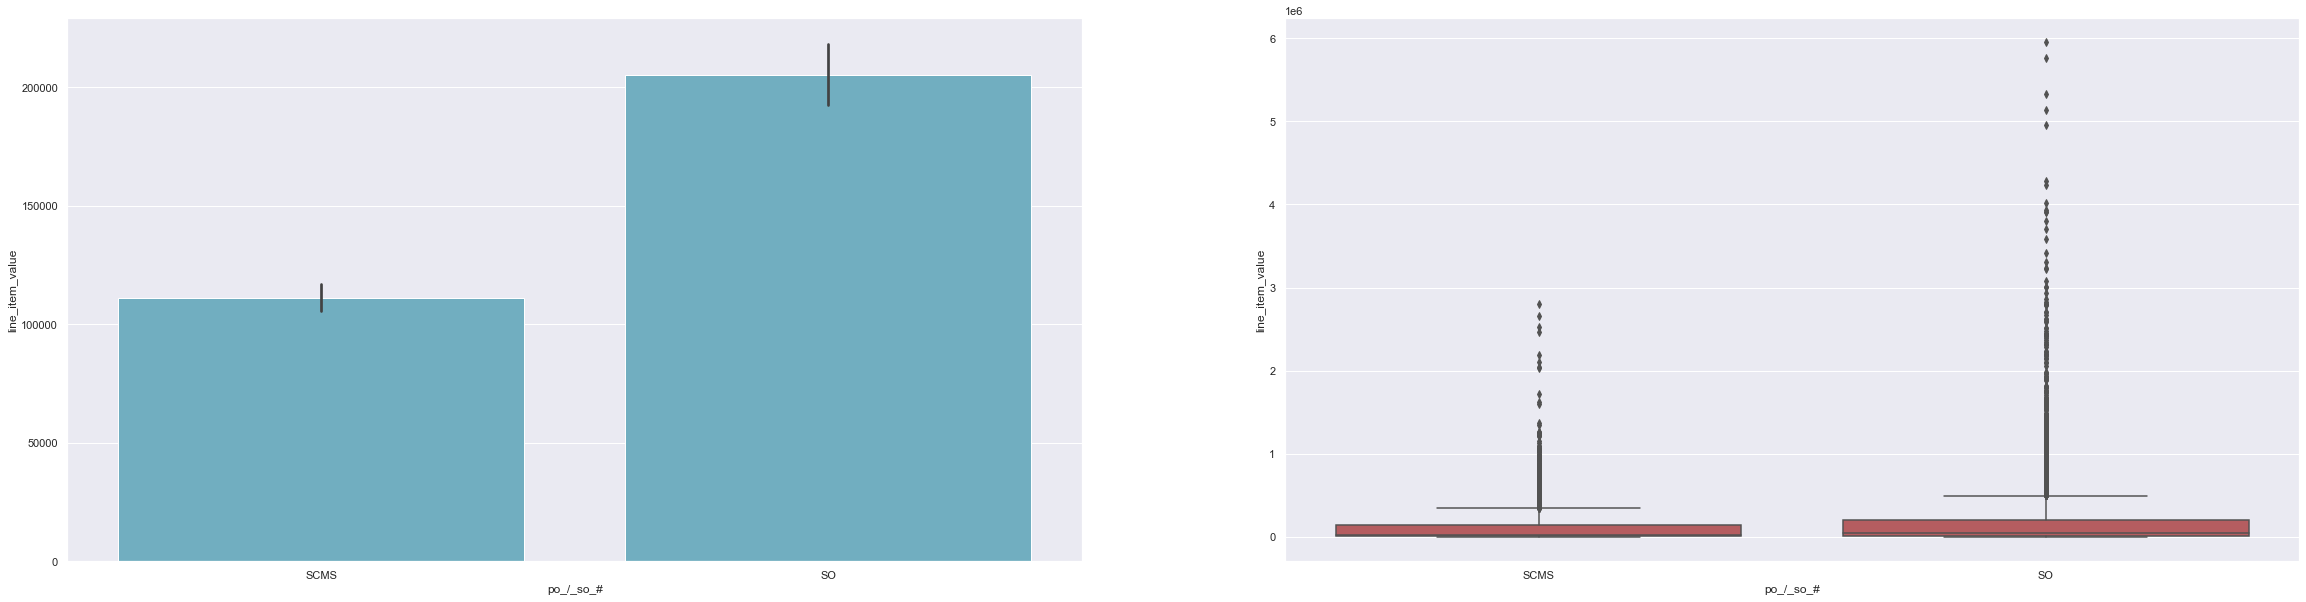

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


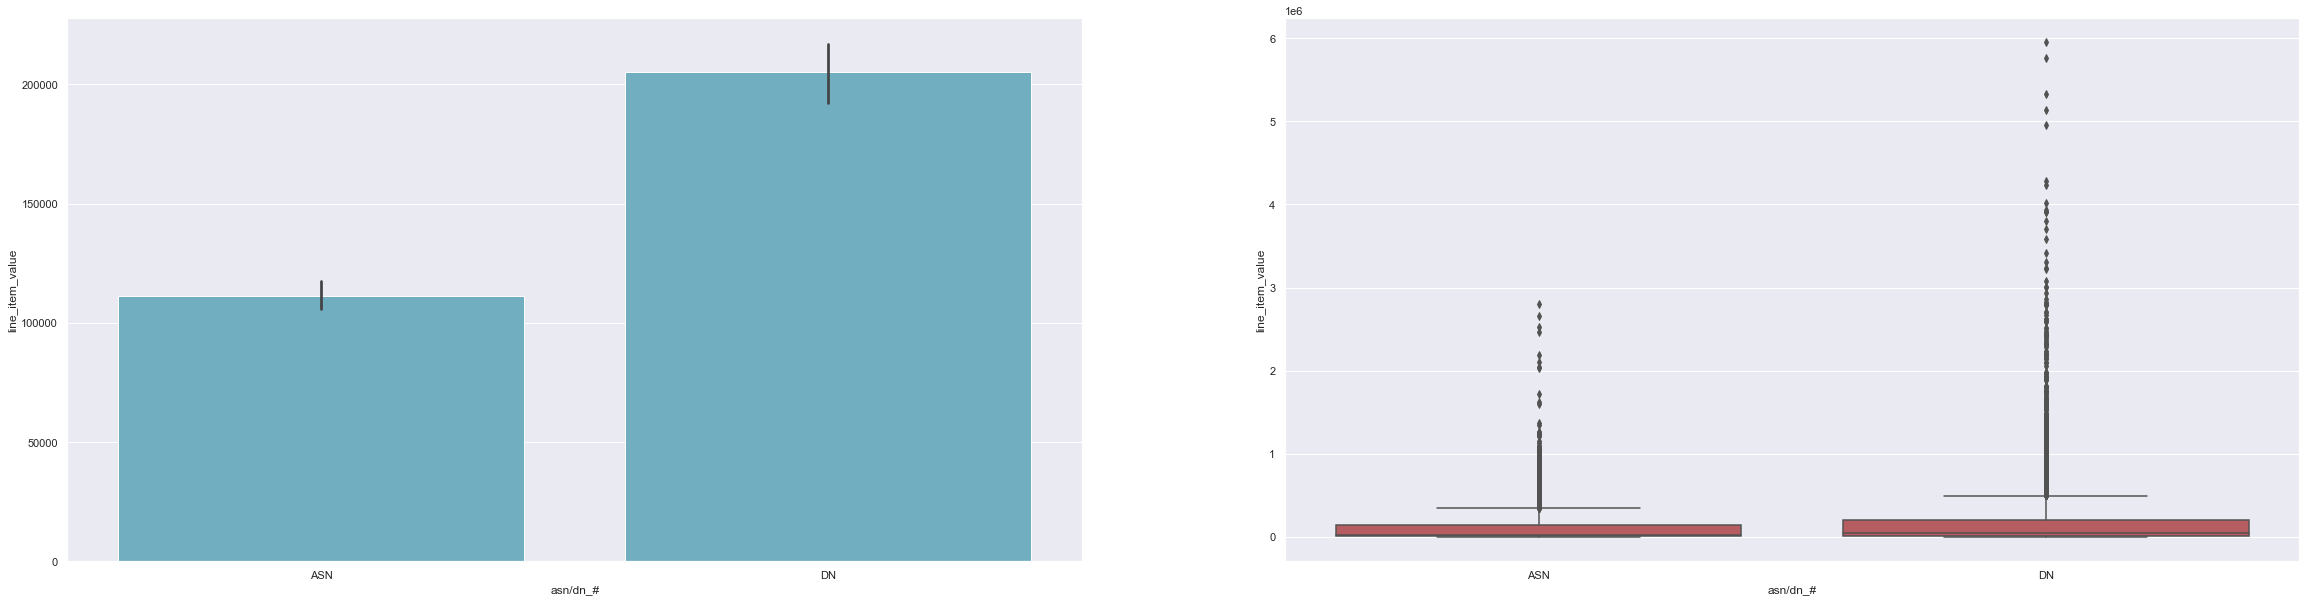

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


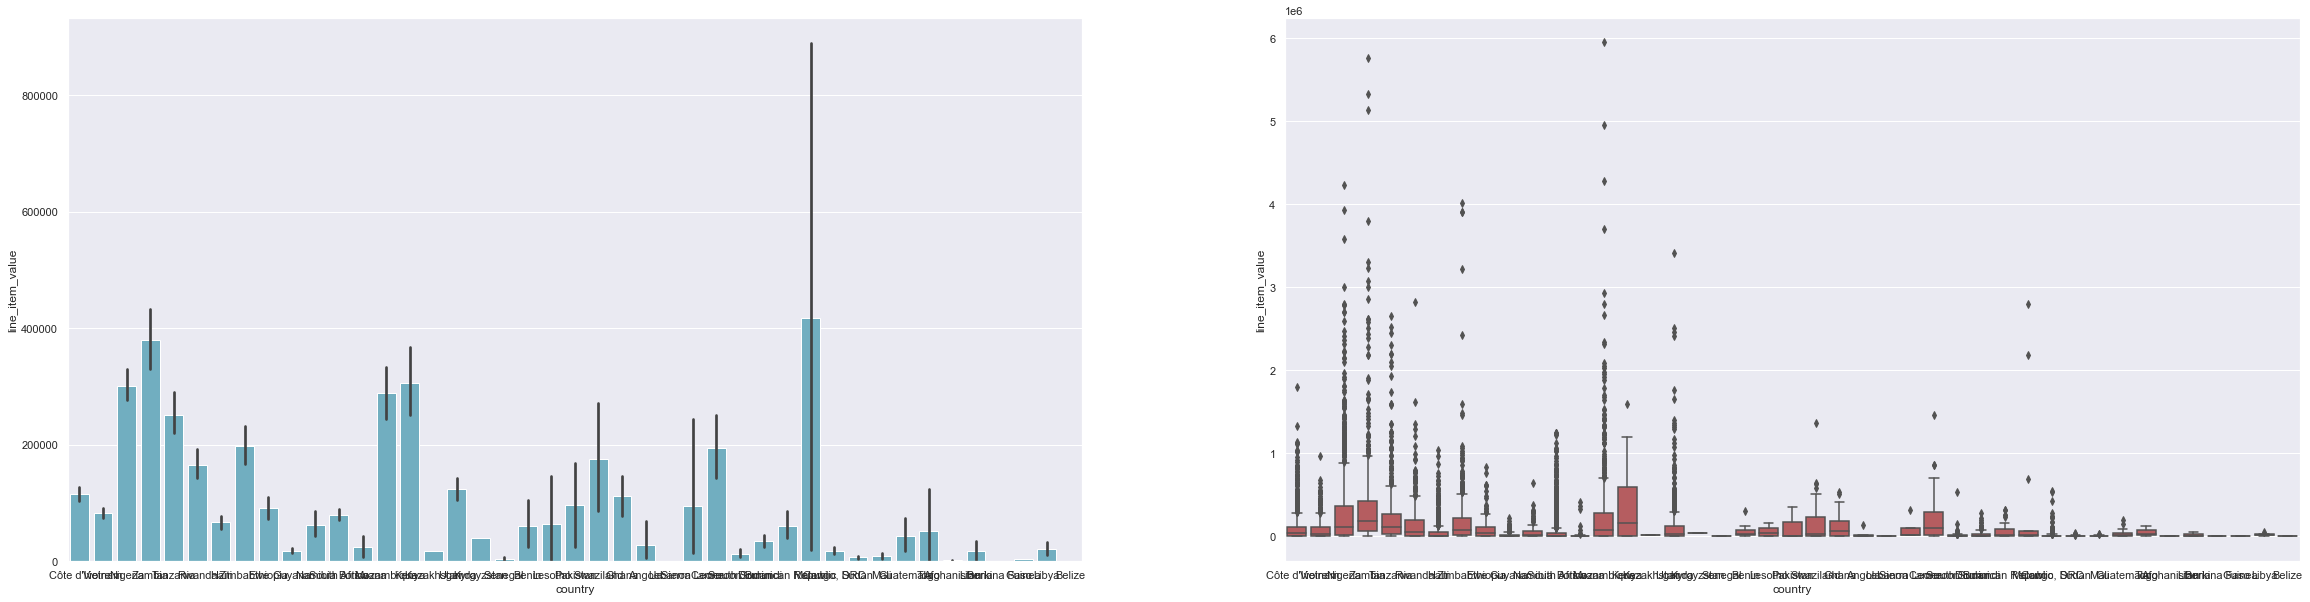

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


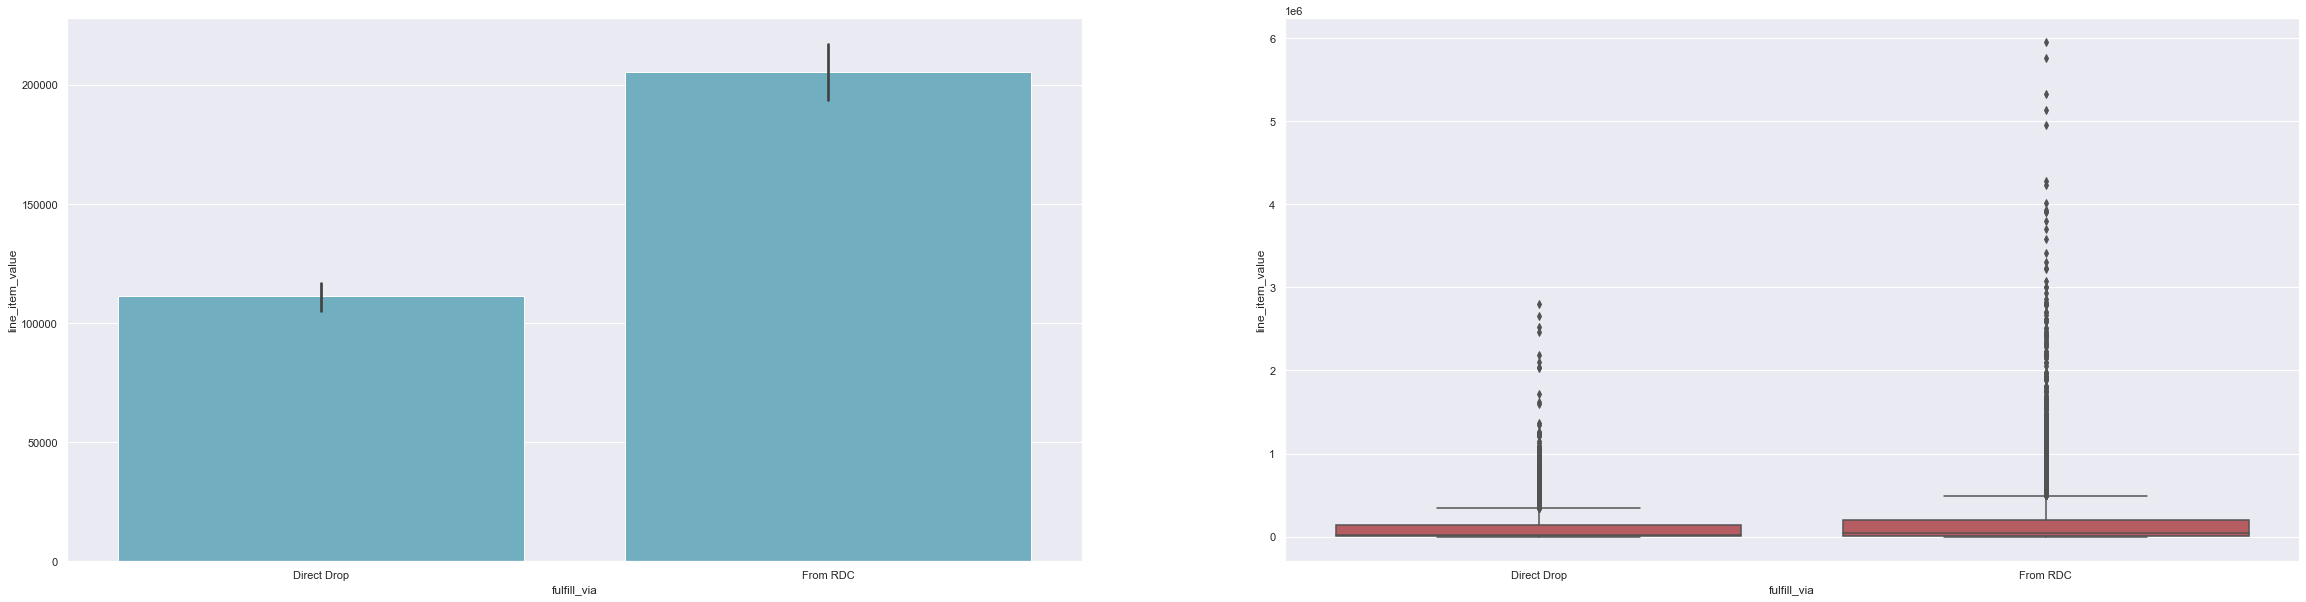

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


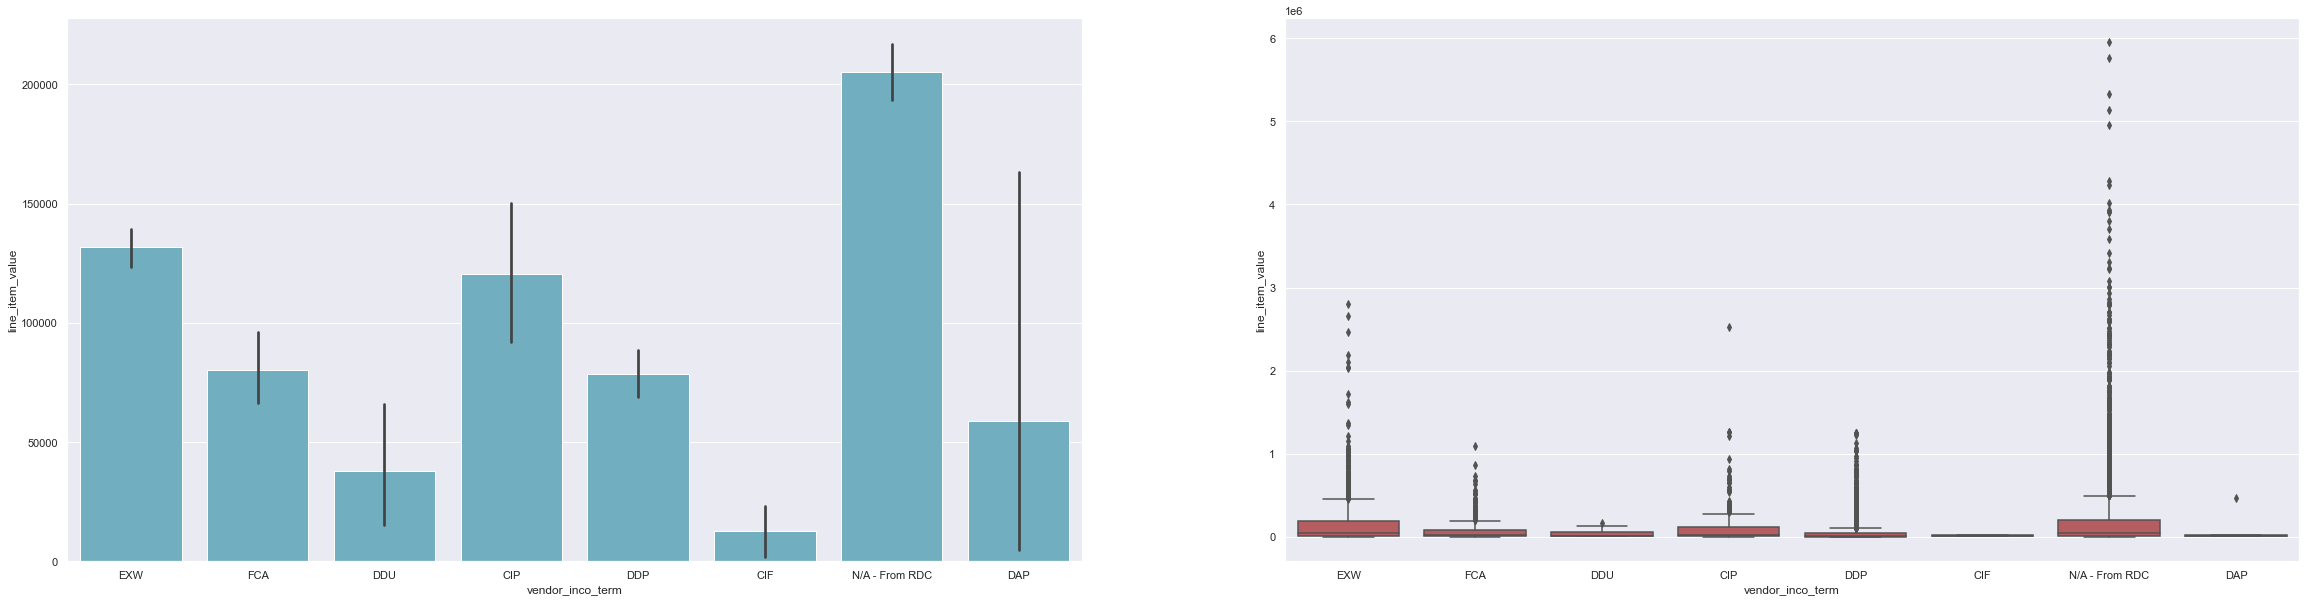

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


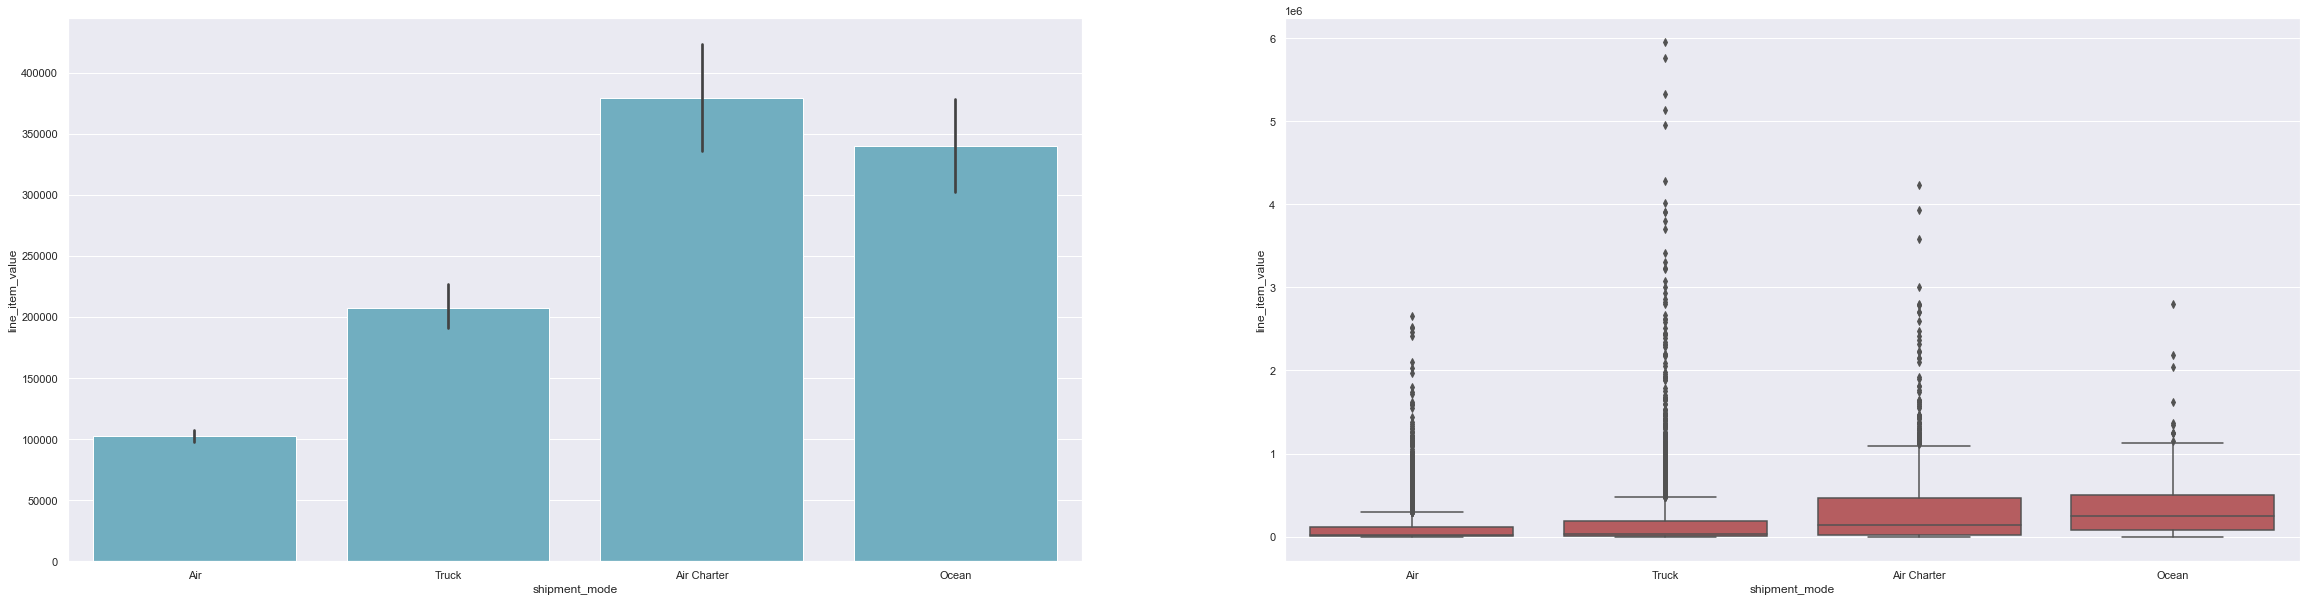

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


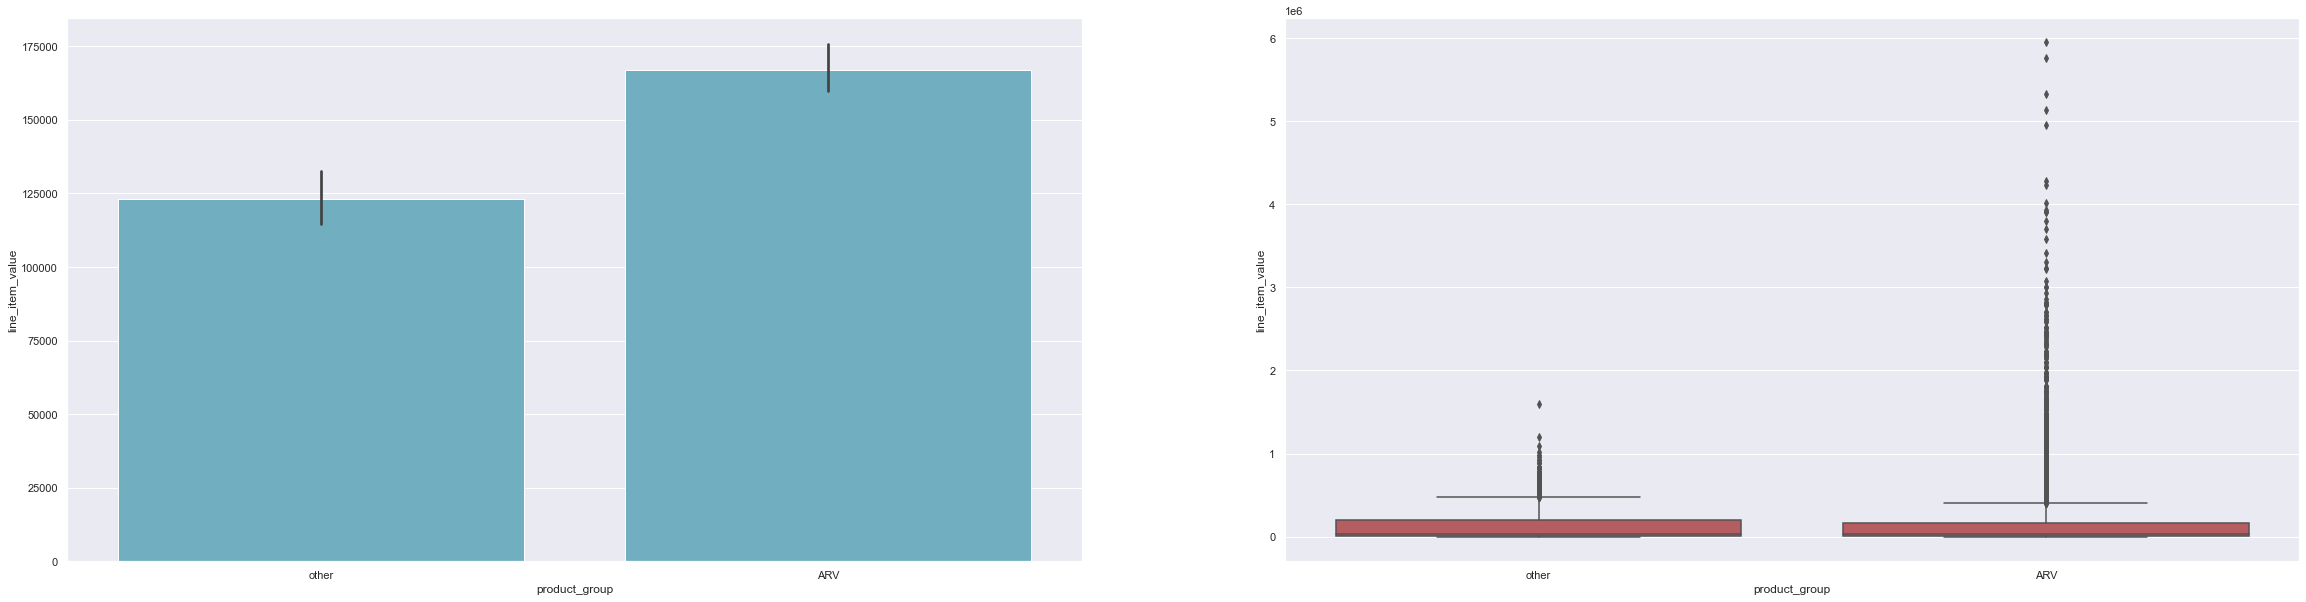

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


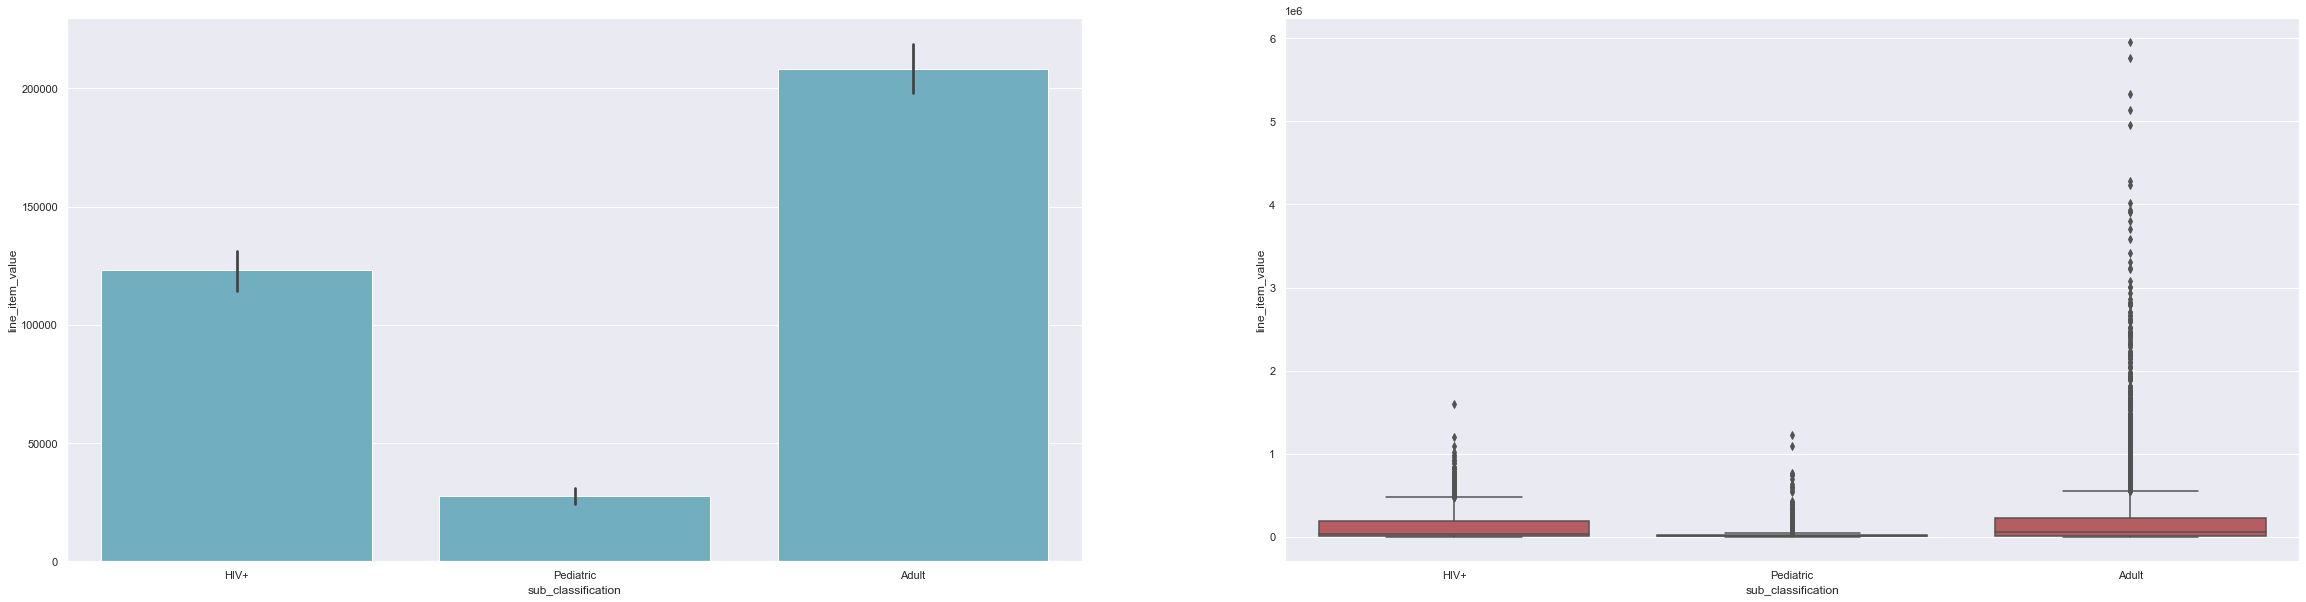

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


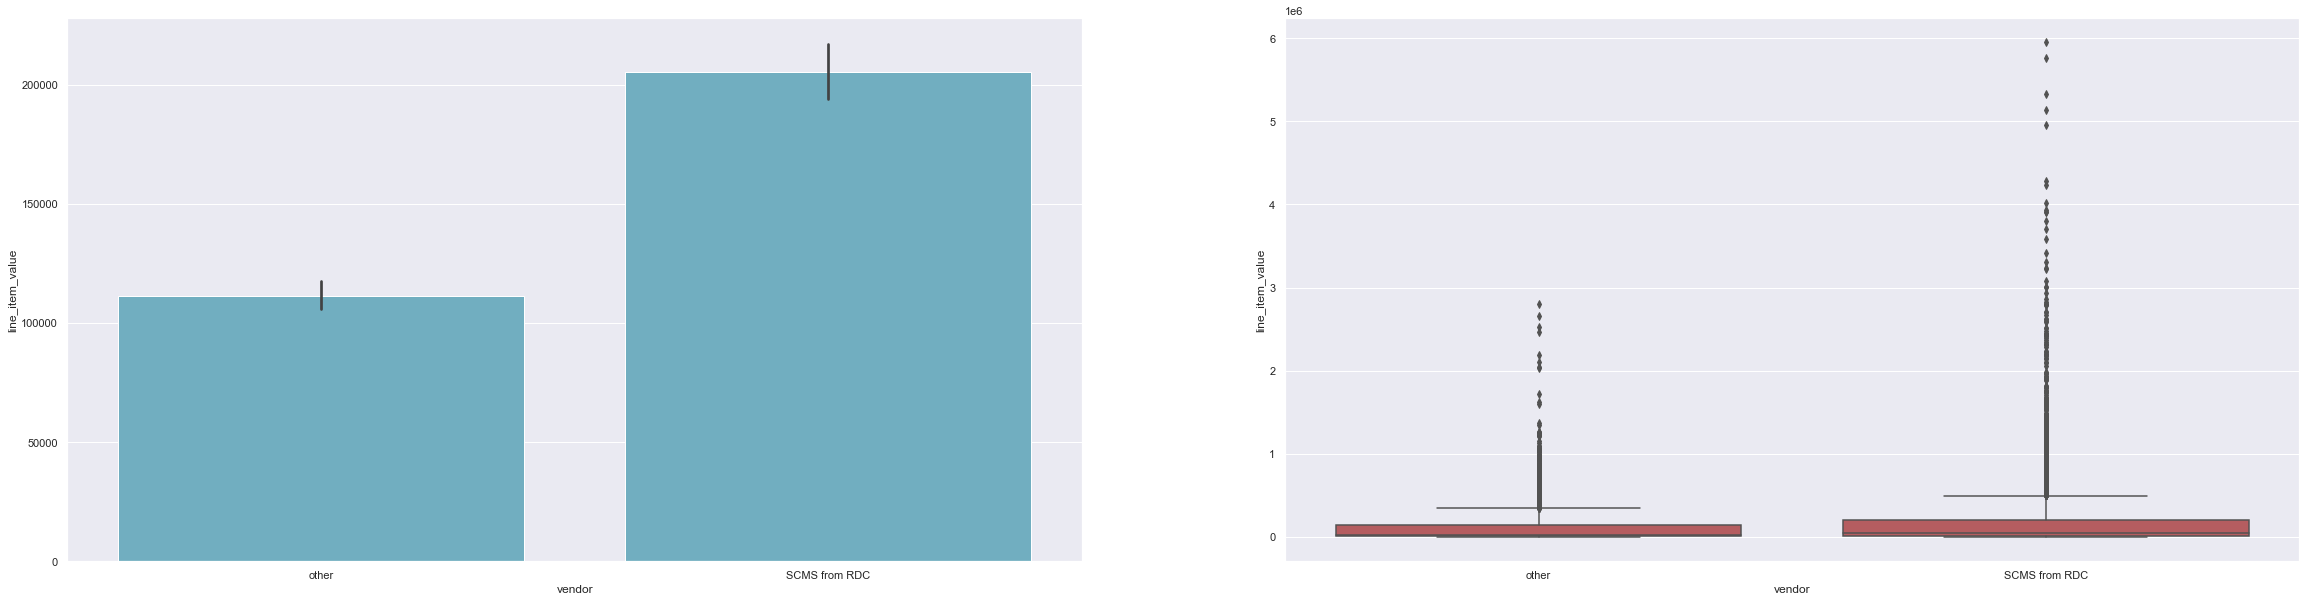

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


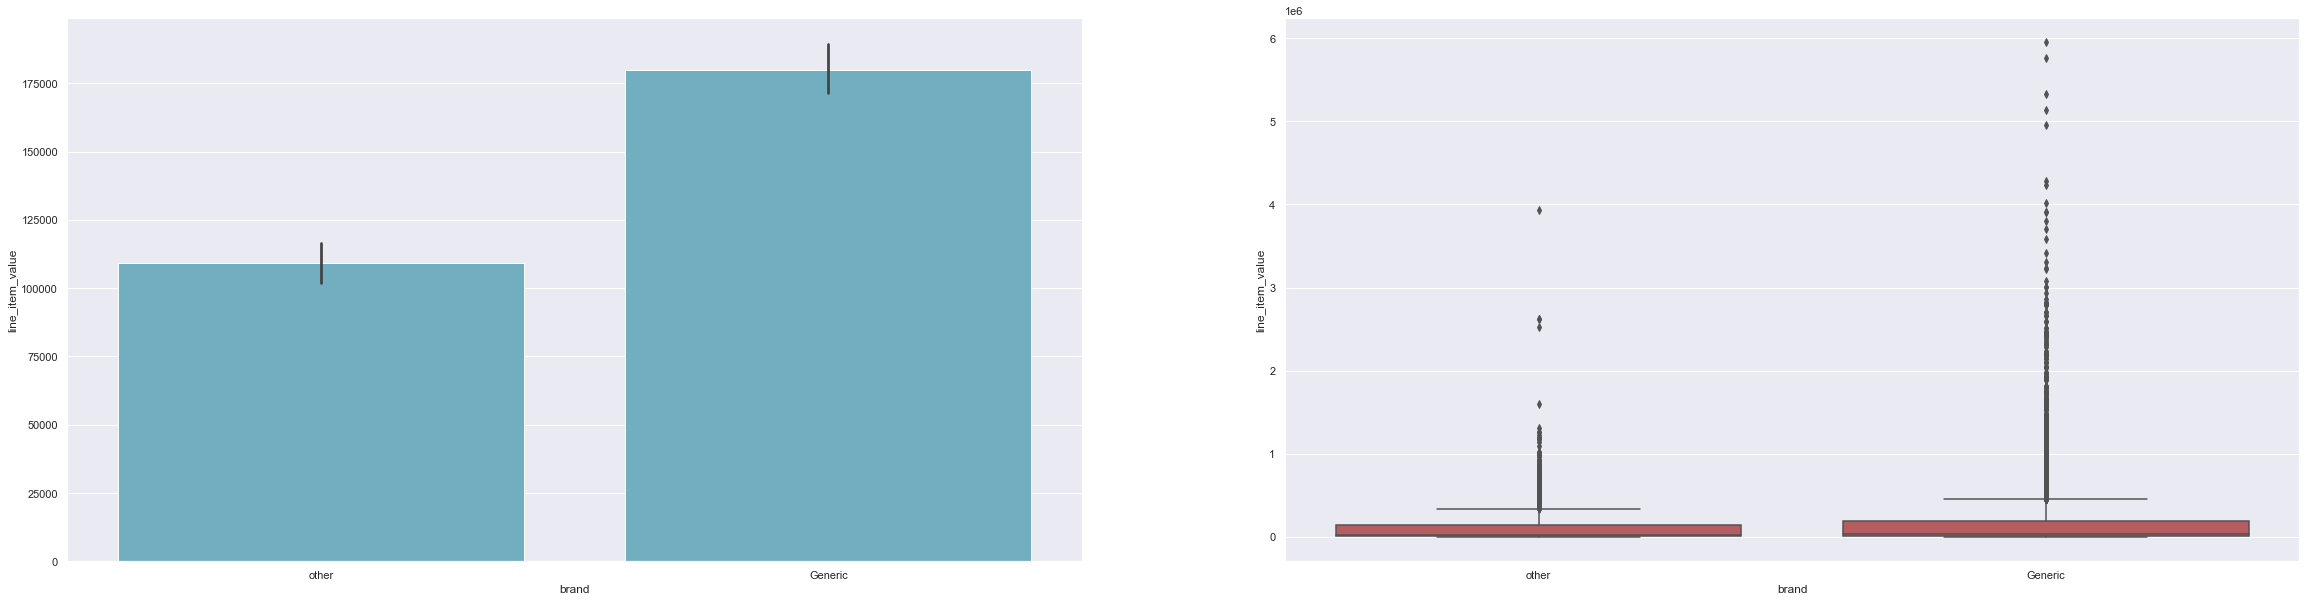

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


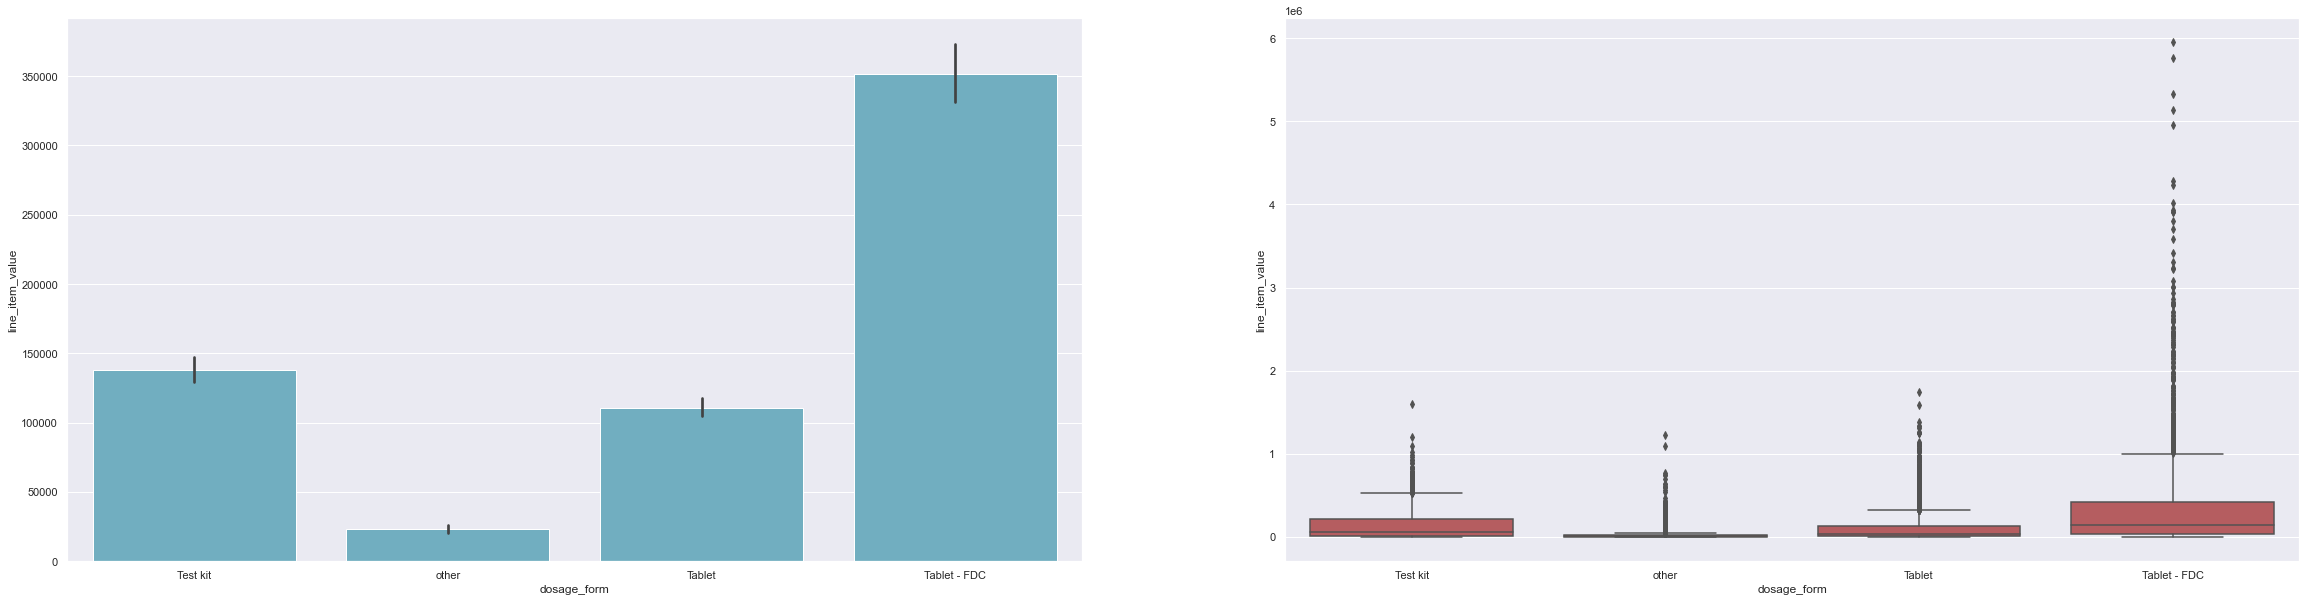

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


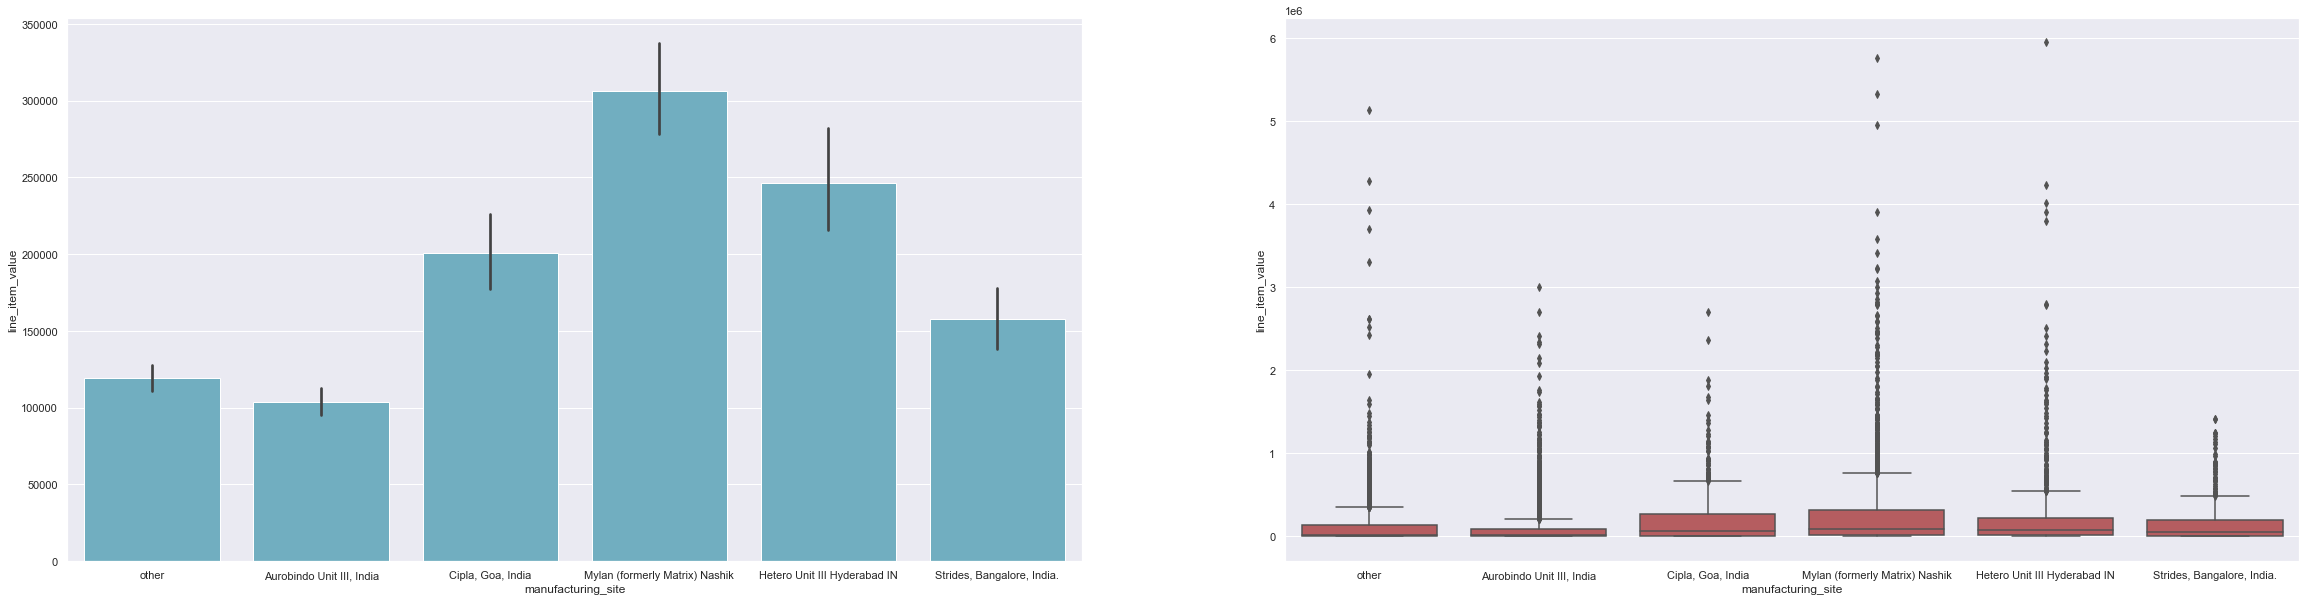

None
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


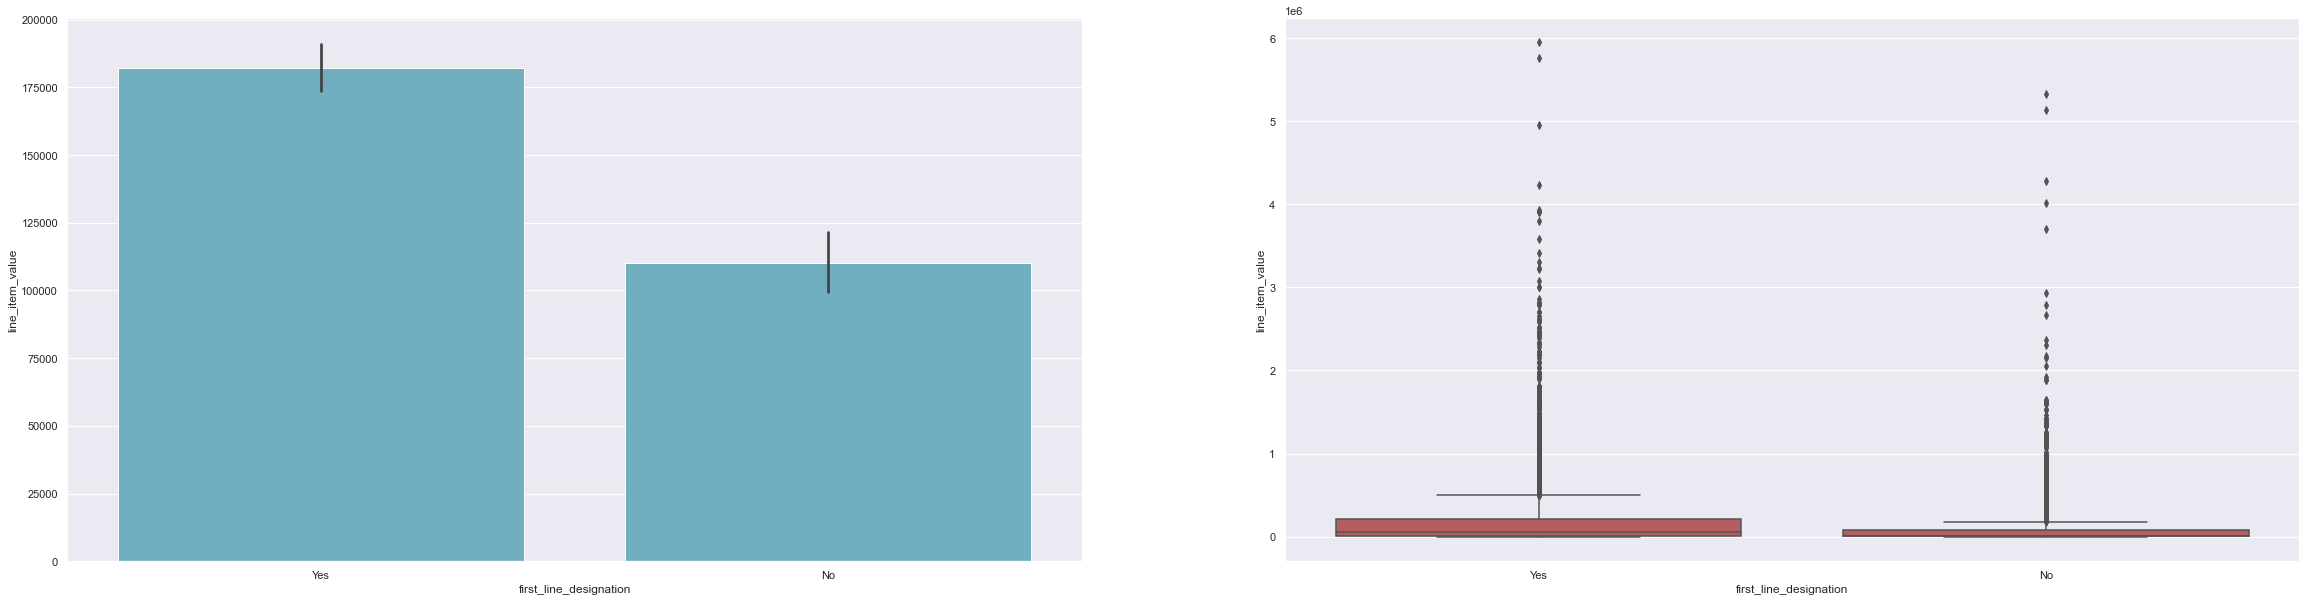

None


In [131]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(Analysis_target(column,30))

In [132]:
def Scatterplots(column):

    fig,axs = plt.subplots(figsize=(8,5))
    sns.scatterplot(x=df[column],y=df["line_item_value"],color="orange")
    plt.show();

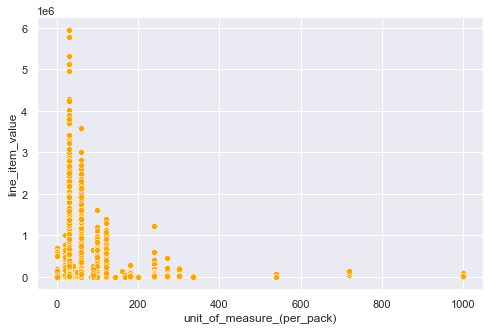

None


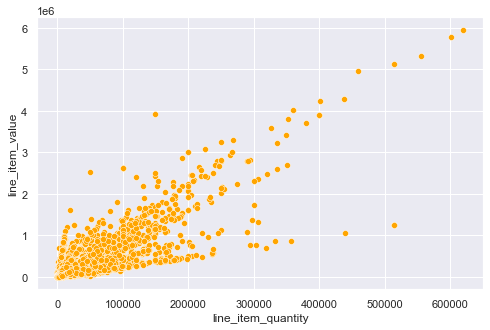

None


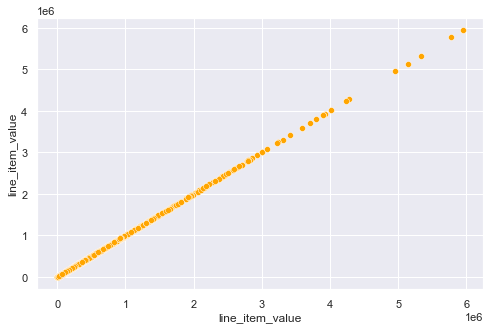

None


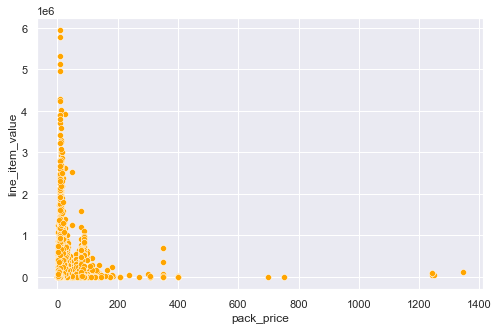

None


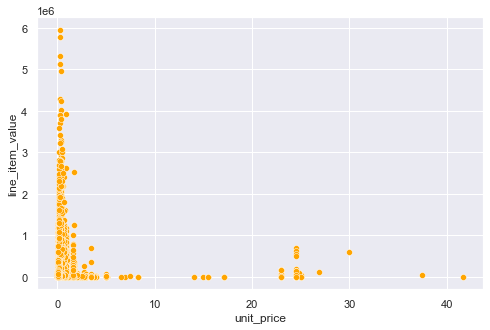

None


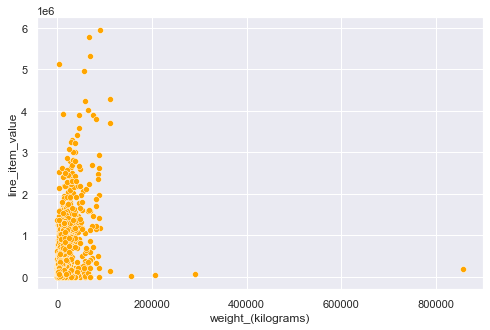

None


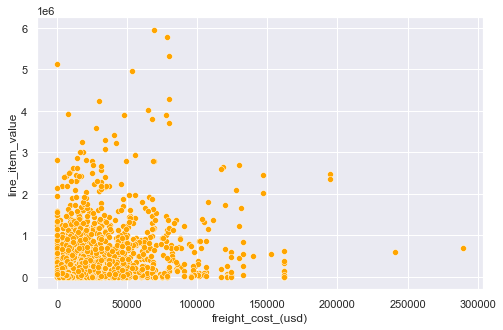

None


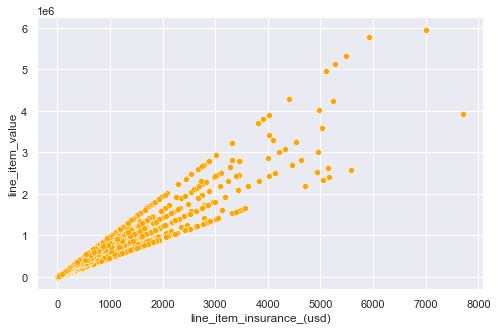

None


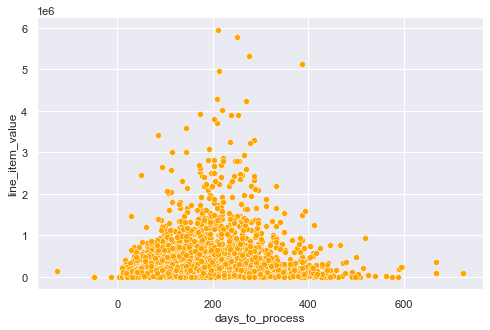

None


In [133]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(Scatterplots(column))

**Handling Outlier**

[]

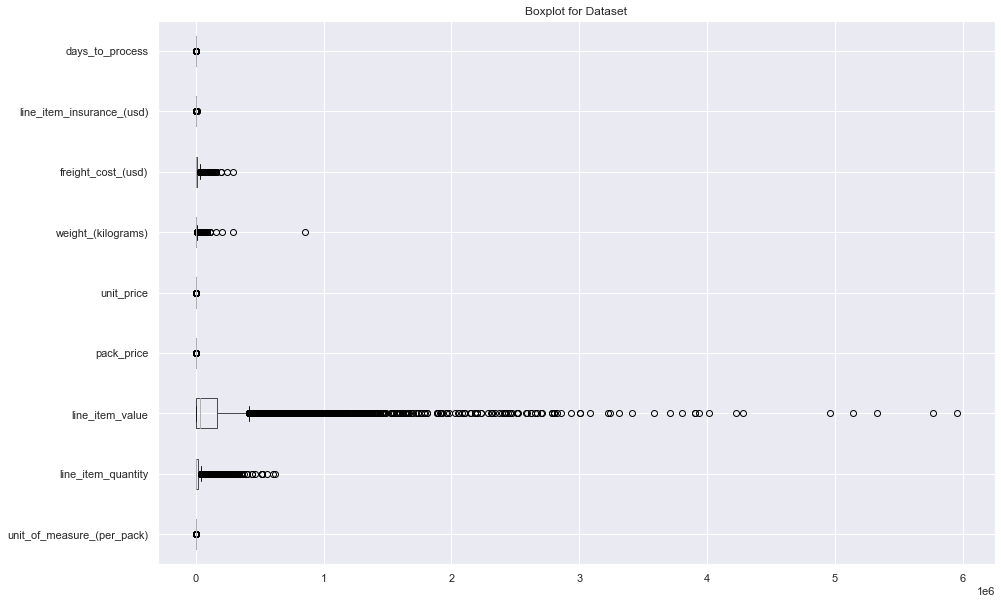

In [134]:
plt.figure(figsize=(15,10))
df.boxplot(vert=0)
plt.title("Boxplot for Dataset")
plt.plot()

In [135]:
##handling the outliers

def handling_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print('Proportion of outliers above upper range is',np.round(len(data[data[i]>higher_fence])*100/len(data[i]),decimals=2))
    print('Proportion of outliers below lower range is',np.round(len(data[data[i]<lower_fence])*100/len(data[i]),decimals=2))
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence

In [136]:
num_cols=[y for y in df.columns if df[y].dtypes=="int64" or df[y].dtypes=="float64"]

In [137]:
for i in num_cols:
    handling_outliers(df,i)
    

unit_of_measure_(per_pack) --- IQR ---> 60.0
Lower Fence: -60.0
Higher Fence: 180.0
Proportion of outliers above upper range is 9.66
Proportion of outliers below lower range is 0.0
______________________________________________
line_item_quantity --- IQR ---> 17036.75
Lower Fence: -25150.125
Higher Fence: 42996.875
Proportion of outliers above upper range is 13.03
Proportion of outliers below lower range is 0.0
______________________________________________
line_item_value --- IQR ---> 164395.31749999998
Lower Fence: -242320.94374999995
Higher Fence: 415260.3262499999
Proportion of outliers above upper range is 10.79
Proportion of outliers below lower range is 0.0
______________________________________________
pack_price --- IQR ---> 19.14
Lower Fence: -24.59
Higher Fence: 51.97
Proportion of outliers above upper range is 11.25
Proportion of outliers below lower range is 0.0
______________________________________________
unit_price --- IQR ---> 0.38
Lower Fence: -0.49000000000000005
Hi

[]

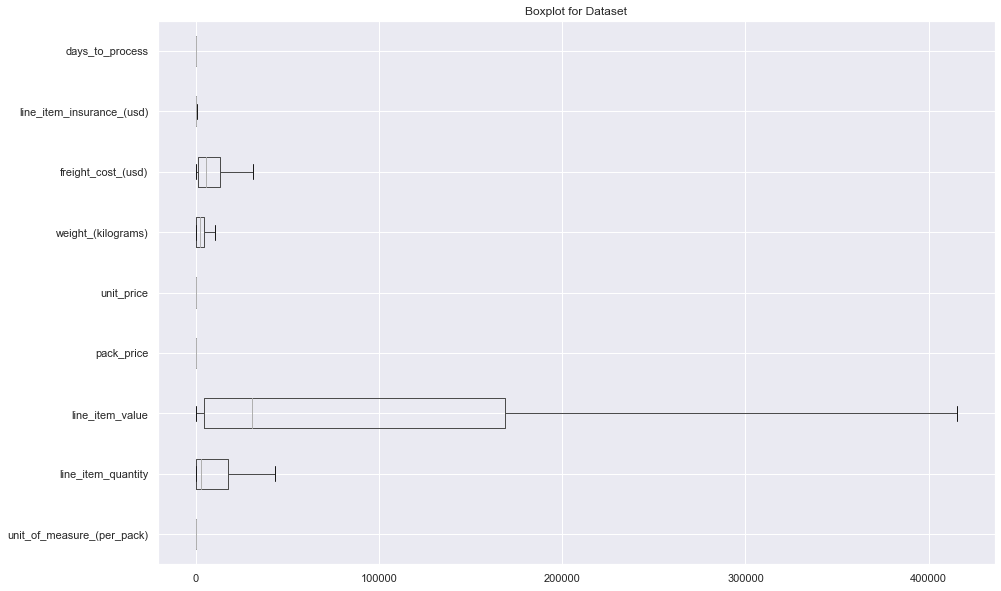

In [138]:
plt.figure(figsize=(15,10))
df.boxplot(vert=0)
plt.title("Boxplot for Dataset")
plt.plot()

In [139]:
obj_cols=[x for x in df.columns if df[x].dtypes=="O"]
obj_cols

['po_/_so_#',
 'asn/dn_#',
 'country',
 'fulfill_via',
 'vendor_inco_term',
 'shipment_mode',
 'product_group',
 'sub_classification',
 'vendor',
 'brand',
 'dosage_form',
 'manufacturing_site',
 'first_line_designation']

In [140]:
corr_matrix=df.corr()
corr_matrix

unit_of_measure_(per_pack)  line_item_quantity  \
unit_of_measure_(per_pack)                    1.000000           -0.237029   
line_item_quantity                           -0.237029            1.000000   
line_item_value                              -0.159315            0.789023   
pack_price                                    0.201532           -0.337528   
unit_price                                   -0.267414           -0.268413   
weight_(kilograms)                           -0.083370            0.615014   
freight_cost_(usd)                           -0.073960            0.448596   
line_item_insurance_(usd)                    -0.161485            0.779610   
days_to_process                              -0.033291            0.164557   

                            line_item_value  pack_price  unit_price  \
unit_of_measure_(per_pack)        -0.159315    0.201532   -0.267414   
line_item_quantity                 0.789023   -0.337528   -0.268413   
line_item_value                    1.000000    0.048747    0.054259   
pack_price                         0.048747    1.000000    0.781071   
unit_price                         0.054259    0.781071    1.000000   
weight_(kilograms)                 0.521220   -0.221641   -0.197919   
freight_cost_(usd)                 0.512784   -0.067271   -0.043650   
line_item_insurance_(usd)          0.982731    0.045983    0.052919   
days_to_process                    0.115898   -0.082399   -0.079666   

                            weight_(kilograms)  freight_cost_(usd)  \
unit_of_measure_(per_pack)           -0.083370           -0.073960   
line_item_quantity                    0.615014            0.448596   
line_item_value                       0.521220            0.512784   
pack_price                           -0.221641           -0.067271   
unit_price                           -0.197919           -0.043650   
weight_(kilograms)                    1.000000            0.496851   
freight_cost_(usd)                    0.496851            1.000000   
line_item_insurance_(usd)             0.505006            0.489883   
days_to_process                       0.192028            0.045582   

                            line_item_insurance_(usd)  days_to_process  
unit_of_measure_(per_pack)                  -0.161485        -0.033291  
line_item_quantity                           0.779610         0.164557  
line_item_value                              0.982731         0.115898  
pack_price                                   0.045983        -0.082399  
unit_price                                   0.052919        -0.079666  
weight_(kilograms)                           0.505006         0.192028  
freight_cost_(usd)                           0.489883         0.045582  
line_item_insurance_(usd)                    1.000000         0.102025  
days_to_process                              0.102025         1.000000

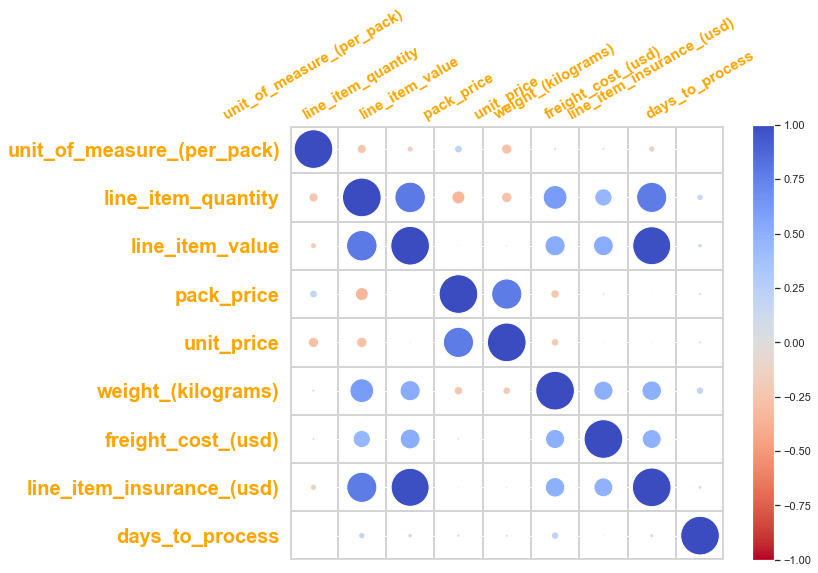

In [141]:
from matplotlib.patches import Circle
import matplotlib.colors as mcolors

# create a white grid with the same dimensions as the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
ax.set_facecolor('white')
ax.imshow(np.ones_like(corr_matrix), cmap='gray_r', interpolation='nearest')

# set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# shift ticks of x axis to top of the graph
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)

# format ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=20, color = "orange", fontweight = "bold")
ax.set_xticklabels(corr_matrix.columns, rotation = 30,fontsize=15, color = "orange", fontweight = "bold")


# create grid lines between the tick labels
ax.set_xticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True, linestyle="solid")
ax.set_yticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True,  linestyle="solid")
ax.grid(which="minor", color="lightgray", linestyle="solid", linewidth=2, )

# add rectangle around the grid
rect = plt.Rectangle((-.5, -.5), len(corr_matrix.columns), len(corr_matrix.columns), linewidth=5, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# create circles with radius proportional to the absolute value of correlation
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1)  # specify the range of values for the colormap
        sm = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
        color = sm.to_rgba(correlation)
        circle = Circle((i, j), radius=abs(correlation)/2.5, facecolor=color)
        ax.add_patch(circle)

# add color bar
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
cbar = plt.colorbar(c_scale, ax=ax)
plt.show()

**Feature engineering**

In [351]:
obj_cols

['po_/_so_#',
 'asn/dn_#',
 'country',
 'fulfill_via',
 'vendor_inco_term',
 'shipment_mode',
 'product_group',
 'sub_classification',
 'vendor',
 'brand',
 'dosage_form',
 'manufacturing_site',
 'first_line_designation']

In [142]:
for column in obj_cols:
            dummies = pd.get_dummies(df[column], prefix=column)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop(column, axis=1)

In [143]:
df.head()

unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                          30                19.0            551.0   
1                         180              1000.0           6200.0   
2                         100               500.0          40000.0   
3                          60             31920.0         127360.8   
4                          60             38000.0         121600.0   

   pack_price  unit_price  weight_(kilograms)  freight_cost_(usd)  \
0       29.00        0.97                13.0           780.34000   
1        6.20        0.03               358.0          4521.50000   
2       51.97        0.80               171.0          1653.78000   
3        3.99        0.07              1855.0         16007.06000   
4        3.20        0.05              7590.0         31163.67625   

   line_item_insurance_(usd)  days_to_process  po_/_so_#_SCMS  po_/_so_#_SO  \
0                       0.83            172.0               1             0   
1                       9.31            172.0               1             0   
2                      60.09            172.0               1             0   
3                     191.34            172.0               1             0   
4                     182.68            172.0               1             0   

   asn/dn_#_ASN  asn/dn_#_DN  country_Afghanistan  country_Angola  \
0             1            0                    0               0   
1             1            0                    0               0   
2             1            0                    0               0   
3             1            0                    0               0   
4             1            0                    0               0   

   country_Belize  country_Benin  country_Botswana  country_Burkina Faso  \
0               0              0                 0                     0   
1               0              0                 0                     0   
2               0              0                 0                     0   
3               0              0                 0                     0   
4               0              0                 0                     0   

   country_Burundi  country_Cameroon  country_Congo, DRC  \
0                0                 0                   0   
1                0                 0                   0   
2                0                 0                   0   
3                0                 0                   0   
4                0                 0                   0   

   country_Côte d'Ivoire  country_Dominican Republic  country_Ethiopia  \
0                      1                           0                 0   
1                      0                           0                 0   
2                      1                           0                 0   
3                      0                           0                 0   
4                      0                           0                 0   

   country_Ghana  country_Guatemala  country_Guinea  country_Guyana  \
0              0                  0               0               0   
1              0                  0               0               0   
2              0                  0               0               0   
3              0                  0               0               0   
4              0                  0               0               0   

   country_Haiti  country_Kazakhstan  country_Kenya  country_Kyrgyzstan  \
0              0                   0              0                   0   
1              0                   0              0                   0   
2              0                   0              0                   0   
3              0                   0              0                   0   
4              0                   0              0                   0   

   country_Lebanon  country_Lesotho  country_Liberia  country_Libya  \
0                0                0                0             

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   unit_of_measure_(per_pack)                         9964 non-null   int64  
 1   line_item_quantity                                 9964 non-null   float64
 2   line_item_value                                    9964 non-null   float64
 3   pack_price                                         9964 non-null   float64
 4   unit_price                                         9964 non-null   float64
 5   weight_(kilograms)                                 9964 non-null   float64
 6   freight_cost_(usd)                                 9964 non-null   float64
 7   line_item_insurance_(usd)                          9964 non-null   float64
 8   days_to_process                                    9964 non-null   float64
 9   po_/_so_

In [145]:
dff=df.copy()

**Model Building**

*Initialize Default Models in a dictionary*

In [146]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as smf

*Separating dependent and Independent Variable*

In [147]:
X=df.drop(["line_item_value"],axis=1)
y=df["line_item_value"]

*Performing Train-Test Split of the Data in 80:20 Ratio*

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [149]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (7971, 90)
Number of rows and columns of the training set for the dependent variable: (7971,)
Number of rows and columns of the test set for the independent variables: (1993, 90)
Number of rows and columns of the test set for the dependent variable: (1993,)


*Scaling the features with Min-Max Scalar*

In [150]:
#since we have treated are data from outliers we are using min-max scaler which will scale the fdata between the range of 0 to 1.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

In [151]:
#Scaled train dataset
data_train_scaled=pd.DataFrame(scaled_train,columns=X_train.columns)
data_train_scaled.head()

unit_of_measure_(per_pack)  line_item_quantity  pack_price  unit_price  \
0                    1.000000            0.056936    0.025977    0.009709   
1                    0.553073            0.192972    1.000000    0.864078   
2                    1.000000            0.009047    0.040408    0.009709   
3                    0.329609            1.000000    0.046758    0.038835   
4                    0.553073            0.070472    1.000000    0.864078   

   weight_(kilograms)  freight_cost_(usd)  line_item_insurance_(usd)  \
0            0.747437            0.205577                   0.011509   
1            0.135200            0.516325                   1.000000   
2            0.013264            0.080328                   0.002857   
3            1.000000            0.620221                   1.000000   
4            0.116630            0.664403                   0.538618   

   days_to_process  po_/_so_#_SCMS  po_/_so_#_SO  asn/dn_#_ASN  asn/dn_#_DN  \
0         0.498418             0.0           1.0           0.0          1.0   
1         0.333861             1.0           0.0           1.0          0.0   
2         0.843354             0.0           1.0           0.0          1.0   
3         0.571203             1.0           0.0           1.0          0.0   
4         0.511076             1.0           0.0           1.0          0.0   

   country_Afghanistan  country_Angola  country_Belize  country_Benin  \
0                  0.0             0.0             0.0            0.0   
1                  0.0             0.0             0.0            0.0   
2                  0.0             0.0             0.0            0.0   
3                  0.0             0.0             0.0            0.0   
4                  0.0             0.0             0.0            0.0   

   country_Botswana  country_Burkina Faso  country_Burundi  country_Cameroon  \
0               0.0                   0.0              0.0               0.0   
1               0.0                   0.0              0.0               0.0   
2               0.0                   0.0              0.0               0.0   
3               0.0                   0.0              0.0               0.0   
4               0.0                   0.0              0.0               0.0   

   country_Congo, DRC  country_Côte d'Ivoire  country_Dominican Republic  \
0                 0.0                    1.0                         0.0   
1                 0.0                    0.0                         0.0   
2                 0.0                    1.0                         0.0   
3                 0.0                    0.0                         0.0   
4                 0.0                    0.0                         0.0   

   country_Ethiopia  country_Ghana  country_Guatemala  country_Guinea  \
0               0.0            0.0                0.0             0.0   
1               0.0            0.0                0.0             0.0   
2               0.0            0.0                0.0             0.0   
3               0.0            0.0                0.0             0.0   
4               0.0            0.0                0.0             0.0   

   country_Guyana  country_Haiti  country_Kazakhstan  country_Kenya  \
0             0.0            0.0                 0.0            0.0   
1             0.0            0.0                 0.0            1.0   
2             0.0            0.0                 0.0            0.0   
3             0.0            0.0                 0.0            0.0   
4             0.0            0.0                 0.0            0.0   

   country_Kyrgyzstan  country_Lebanon  country_Lesotho  country_Liberia  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4        

In [152]:
#Scaled test dataset
data_test_scaled=pd.DataFrame(scaled_test,columns=X_test.columns)
data_test_scaled.head()

unit_of_measure_(per_pack)  line_item_quantity  pack_price  unit_price  \
0                    0.329609            0.333078    0.114297    0.097087   
1                    1.000000            0.106592    0.035790    0.009709   
2                    0.553073            0.186041    1.000000    0.776699   
3                    0.329609            0.258281    0.078699    0.067961   
4                    0.329609            0.469464    0.061574    0.048544   

   weight_(kilograms)  freight_cost_(usd)  line_item_insurance_(usd)  \
0            0.378124            1.000000                   0.161623   
1            1.000000            0.734535                   0.014140   
2            0.307634            1.000000                   1.000000   
3            0.226344            0.321247                   0.075380   
4            0.399631            1.000000                   0.166820   

   days_to_process  po_/_so_#_SCMS  po_/_so_#_SO  asn/dn_#_ASN  asn/dn_#_DN  \
0         0.568038             1.0           0.0           1.0          0.0   
1         0.568038             0.0           1.0           0.0          1.0   
2         0.473101             1.0           0.0           1.0          0.0   
3         0.871835             0.0           1.0           0.0          1.0   
4         0.549051             0.0           1.0           0.0          1.0   

   country_Afghanistan  country_Angola  country_Belize  country_Benin  \
0                  0.0             0.0             0.0            0.0   
1                  0.0             0.0             0.0            0.0   
2                  0.0             0.0             0.0            0.0   
3                  0.0             0.0             0.0            0.0   
4                  0.0             0.0             0.0            0.0   

   country_Botswana  country_Burkina Faso  country_Burundi  country_Cameroon  \
0               0.0                   0.0              0.0               0.0   
1               0.0                   0.0              0.0               0.0   
2               0.0                   0.0              0.0               0.0   
3               0.0                   0.0              0.0               0.0   
4               0.0                   0.0              0.0               0.0   

   country_Congo, DRC  country_Côte d'Ivoire  country_Dominican Republic  \
0                 0.0                    0.0                         0.0   
1                 0.0                    0.0                         0.0   
2                 0.0                    0.0                         0.0   
3                 0.0                    0.0                         0.0   
4                 0.0                    0.0                         0.0   

   country_Ethiopia  country_Ghana  country_Guatemala  country_Guinea  \
0               0.0            0.0                0.0             0.0   
1               0.0            0.0                0.0             0.0   
2               0.0            0.0                0.0             0.0   
3               0.0            0.0                0.0             0.0   
4               0.0            0.0                0.0             0.0   

   country_Guyana  country_Haiti  country_Kazakhstan  country_Kenya  \
0             0.0            0.0                 0.0            0.0   
1             0.0            0.0                 0.0            0.0   
2             0.0            0.0                 0.0            0.0   
3             0.0            0.0                 0.0            0.0   
4             0.0            1.0                 0.0            0.0   

   country_Kyrgyzstan  country_Lebanon  country_Lesotho  country_Liberia  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4        

In [153]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (7971, 90)
Number of rows and columns of the training set for the dependent variable: (7971,)
Number of rows and columns of the test set for the independent variables: (1993, 90)
Number of rows and columns of the test set for the dependent variable: (1993,)


In [154]:
# This adds the constant term beta to the Simple Linear Regression.
x_train_lr=smf.add_constant(X_train)
x_train_lr.head()

const  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
8140    1.0                         180            2449.000        1.35   
2375    1.0                         100            8298.000       51.97   
6794    1.0                         180             390.000        2.10   
4439    1.0                          60           42996.875        2.43   
6195    1.0                         100            3031.000       51.97   

      unit_price  weight_(kilograms)  freight_cost_(usd)  \
8140        0.01         7889.000000             6406.53   
2375        0.89         1427.000000            16090.59   
6794        0.01          140.000000             2503.33   
4439        0.04        10554.733517            19328.36   
6195        0.89         1231.000000            20705.23   

      line_item_insurance_(usd)  days_to_process  po_/_so_#_SCMS  \
8140                       7.13            156.0               0   
2375                     619.53            104.0               1   
6794                       1.77            265.0               0   
4439                     619.53            179.0               1   
6195                     333.69            160.0               1   

      po_/_so_#_SO  asn/dn_#_ASN  asn/dn_#_DN  country_Afghanistan  \
8140             1             0            1                    0   
2375             0             1            0                    0   
6794             1             0            1                    0   
4439             0             1            0                    0   
6195             0             1            0                    0   

      country_Angola  country_Belize  country_Benin  country_Botswana  \
8140               0               0              0                 0   
2375               0               0              0                 0   
6794               0               0              0                 0   
4439               0               0              0                 0   
6195               0               0              0                 0   

      country_Burkina Faso  country_Burundi  country_Cameroon  \
8140                     0                0                 0   
2375                     0                0                 0   
6794                     0                0                 0   
4439                     0                0                 0   
6195                     0                0                 0   

      country_Congo, DRC  country_Côte d'Ivoire  country_Dominican Republic  \
8140                   0                      1                           0   
2375                   0                      0                           0   
6794                   0                      1                           0   
4439                   0                      0                           0   
6195                   0                      0                           0   

      country_Ethiopia  country_Ghana  country_Guatemala  country_Guinea  \
8140                 0              0                  0               0   
2375                 0              0                  0               0   
6794                 0              0                  0               0   
4439                 0              0                  0               0   
6195                 0              0                  0               0   

      country_Guyana  country_Haiti  country_Kazakhstan  country_Kenya  \
8140               0              0                   0              0   
2375               0              0                   0              1   
6794               0              0                   0              0   
4439               0              0                   0              0   
6195               0              0                   0              0   

      country_Kyrgyzstan  country_Lebanon  country_Lesotho  country_Liberia  \
8140                   0                0                0                0   

In [155]:
y_train=y_train.values.reshape(-1,1) 
y_train.shape

(7971, 1)

In [156]:
lr_sm=smf.OLS(y_train,x_train_lr).fit()

In [157]:
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3765.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:06:05   Log-Likelihood:                -91644.
No. Observations:                7971   AIC:                         1.834e+05
Df Residuals:                    7898   BIC:                         1.839e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -3093.0616    480.430     -6.438      0.000   -4034.830   -2151.293
unit_of_measure_(per_pack)                           23.6837     11.201      2.114      0.035       1.727      45.640
line_item_quantity                                    0.6958      0.040     17.266      0.000       0.617       0.775
pack_price                                          292.1847     44.990      6.494      0.000     203.992     380.377
unit_price                                         4216.4239   2293.872      1.838      0.066    -280.173    8713.020
weight_(kilograms)                                    0.5446      0.141      3.867      0.000       0.269       0.821
freight_cost_(usd)                                    0.3925      0.042      9.342      0.000       0.310       0.475
line_item_insurance_(usd)                           599.7656      2.656    225.777      0.000     594.558     604.973
days_to_process                                      15.4245      4.120      3.743      0.000       7.348      23.501
po_/_so_#_SCMS                                    -1279.2439    538.263     -2.377      0.017   -2334.382    -224.106
po_/_so_#_SO                                      -1813.8177    291.510     -6.222      0.000   -2385.254   -1242.381
asn/dn_#_ASN                                      -1279.2439    538.263     -2.377      0.017   -2334.382    -224.106
asn/dn_#_DN                                       -1813.8177    291.510     -6.222      0.000   -2385.254   -1242.381
country_Afghanistan                               -5424.7514   2.35e+04     -0.231      0.818   -5.16e+04    4.07e+04
country_Angola                                    -1.132e+04   8990.881     -1.259      0.208   -2.89e+04    6303.409
country_Belize                                     1.048e+04   2.35e+04      0.447      0.655   -3.55e+04    5.65e+04
country_Benin                                     -3907.2559   7602.462     -0.514      0.607   -1.88e+04     1.1e+04
country_Botswana                                  -3997.4571   3605.766     -1.109      0.268   -1.11e+04    3070.798
country_Burkina Faso                              -3239.9246   1.67e+04     -0.195      0.846   -3.59e+04    2.94e+04
country_Burundi                                    1.139e+04   3147.988      3.618      0.000    5217.369    1.76e+04
country_Cameroon                                   1.044e+04   3469.180      3.009      0.003    3639.586    1.72e+04
country_Congo, DRC                                 4814.4737   2187.622      2.201      0.028     526.157    9102.791
country_Côte d'Ivoire                             -1992.0532   1843.986     -1.080      0.280   -5606.754    1622.647
country_Dominic

In [158]:
#Backward elimination technique in linear regression 
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = smf.add_constant(X_1)
    lr = smf.OLS(y_train,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['unit_of_measure_(per_pack)', 'line_item_quantity', 'pack_price', 'unit_price', 'weight_(kilograms)', 'freight_cost_(usd)', 'line_item_insurance_(usd)', 'days_to_process', 'po_/_so_#_SCMS', 'po_/_so_#_SO', 'asn/dn_#_ASN', 'asn/dn_#_DN', 'country_Burundi', 'country_Cameroon', "country_Côte d'Ivoire", 'country_Ethiopia', 'country_Ghana', 'country_Nigeria', 'country_South Africa', 'country_Vietnam', 'country_Zambia', 'country_Zimbabwe', 'fulfill_via_Direct Drop', 'fulfill_via_From RDC', 'vendor_inco_term_CIP', 'vendor_inco_term_EXW', 'vendor_inco_term_N/A - From RDC', 'shipment_mode_Truck', 'product_group_other', 'sub_classification_HIV+', 'vendor_SCMS from RDC', 'vendor_other', 'brand_Generic', 'brand_other', 'dosage_form_Tablet', 'manufacturing_site_Aurobindo Unit III, India', 'manufacturing_site_Cipla, Goa, India', 'manufacturing_site_Hetero Unit III Hyderabad IN', 'manufacturing_site_Strides, Bangalore, India.', 'manufacturing_site_other', 'first_line_designation_No', 'first_line_des

Here we are eliminating the columns that has p-value > 0.05.

*Building Multiple Linear Regression model with selected features*

In [159]:
x_train_be=X_train[selected_features_BE]
x_test_be=X_test[selected_features_BE]

In [160]:
lr=LinearRegression()
lr.fit(x_train_be,y_train)

LinearRegression()

In [161]:
lr.score(x_train_be,y_train)

0.971550988221532

In [162]:
y_pred_train=lr.predict(x_train_be)
y_pred_test=lr.predict(x_test_be)

In [163]:
def adjusted_r2(data,true,pred):
    r2=r2_score(true,pred)
    n=data.shape[0]
    p=data.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p*1)
    return adj_r2

def accuracy_metrics(test,pred,type_):
    r2=r2_score(test,pred)
    rmse=np.sqrt(mean_squared_error(test,pred))
    if r2:
        print("The r2 score for {} is {}%".format(type_,(r2*100)))
        print("RMSE score for {} is {}".format(type_,(rmse)))
    return None

In [164]:
#for train accuracy
accuracy_metrics(y_train,y_pred_train,"train")

The r2 score for train is 97.15509882215319%
RMSE score for train is 23877.098775851566


In [165]:
#for test accuracy
(accuracy_metrics(y_test,y_pred_test,"test"))

The r2 score for test is 97.33179574270581%
RMSE score for test is 22689.5589661058


In [166]:
def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [167]:
results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression',r2_score(y_train,y_pred_train),
                             adjusted_r2(X_train,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2(X_test,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  Train_RMSE score  \
0  Linear Regression        0.971551             0.97123      23877.098776   

   Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0       0.973318            0.97207     22689.558966

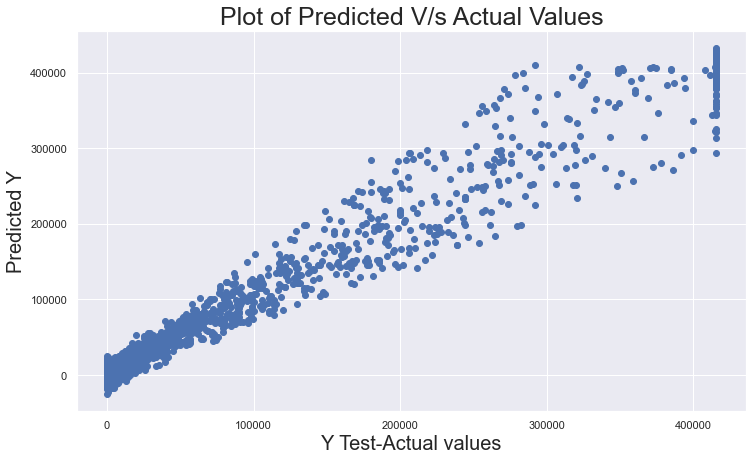

In [168]:
plt.figure(figsize=(12,7))
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test-Actual values',size=20)
plt.ylabel('Predicted Y',size=20)
plt.title('Plot of Predicted V/s Actual Values',size=25)
plt.show()

*Building Lasso Regression Model*

In [169]:
from sklearn.linear_model import Lasso

lasso = LassoCV()
lasso.fit(X_train, y_train)

LassoCV()

In [170]:
print("Best alpha built using lasso regressor is %f"%lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X_train,y_train))

Best alpha built using lasso regressor is 1715766.023934
Best score using built-in LassoCV: 0.958775


In [171]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef

unit_of_measure_(per_pack)                             0.000000
line_item_quantity                                     1.473593
pack_price                                             0.000000
unit_price                                             0.000000
weight_(kilograms)                                     0.000000
freight_cost_(usd)                                     0.966374
line_item_insurance_(usd)                            513.202777
days_to_process                                        0.000000
po_/_so_#_SCMS                                         0.000000
po_/_so_#_SO                                          -0.000000
asn/dn_#_ASN                                           0.000000
asn/dn_#_DN                                           -0.000000
country_Afghanistan                                    0.000000
country_Angola                                        -0.000000
country_Belize                                        -0.000000
country_Benin                           

In [172]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 87 variables


we can see that Lasso model has given most feature importance to coloumn "line_item_insurance_(usd)"

In [173]:
imp_coef_lasso = coef.sort_values()

features_by_lasso = imp_coef_lasso

In [174]:
y_pred_lasso_train=lasso.predict(X_train)
y_pred_lasso_test=lasso.predict(X_test)

In [175]:
#for train accuracy
accuracy_metrics(y_train,y_pred_lasso_train,"train")

The r2 score for train is 95.87751314710499%
RMSE score for train is 28742.702723572984


In [176]:
#for test accuracy
accuracy_metrics(y_test,y_pred_lasso_test,"test")

The r2 score for test is 96.1491417945914%
RMSE score for test is 27258.081243723984


In [177]:
results.loc[len(results)] = ['Lasso Regression',r2_score(y_train,y_pred_lasso_train),
                             adjusted_r2(X_train,y_train,y_pred_lasso_train),
                             rmse(y_train,y_pred_lasso_train),r2_score(y_test,y_pred_lasso_test),
                             adjusted_r2(X_test,y_test,y_pred_lasso_test),rmse(y_test,y_pred_lasso_test)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  Train_RMSE score  \
0  Linear Regression        0.971551             0.97123      23877.098776   
1   Lasso Regression        0.958775             0.95831      28742.702724   

   Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0       0.973318            0.97207     22689.558966  
1       0.961491            0.95969     27258.081244

**Model Building Using other ML Models**

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [179]:
x=df.drop(["line_item_value"],axis=1)
y=df["line_item_value"] 

In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.20)

In [277]:
print('Number of rows and columns of the training set for the independent variables:',x_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',x_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (7971, 90)
Number of rows and columns of the training set for the dependent variable: (7971,)
Number of rows and columns of the test set for the independent variables: (1993, 90)
Number of rows and columns of the test set for the dependent variable: (1993,)


In [182]:
# Fit with robust scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

robustscaler = RobustScaler()
x_train_scaled = robustscaler.fit_transform(x_train)
x_test_scaled = robustscaler.fit_transform(x_test)

In [183]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=42, max_iter=1000)
rfr = RandomForestRegressor(random_state=42)
dtr = tree.DecisionTreeRegressor(random_state=42)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
result_reg=(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))
result_reg                           

Train RMSE     Test RMSE  Training Score  \
Linear Regression        2.346288e+04  24161.750726        0.972262   
Decision Tree Regressor  2.586466e-10  25919.523211        1.000000   
Random Forest Regressor  5.960097e+03  17820.212409        0.998210   
ANN Regressor            2.296582e+04  23933.098684        0.973425   

                         Test Score  
Linear Regression          0.970949  
Decision Tree Regressor    0.966569  
Random Forest Regressor    0.984198  
ANN Regressor              0.971497

**Hyperparameter Tuning**

*Grid Search on Decision Tree*

In [184]:
# Create the parameter grid 
param_grid = {
    'max_depth': [5, 10, 25,50],
    'min_samples_leaf': [5, 10, 20, 30, 50],
    'min_samples_split': [5,10,15,30]}

dtr=tree.DecisionTreeRegressor(random_state=100)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=dtr, 
                           param_grid=param_grid, 
                            cv=4)

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [185]:
dtr = tree.DecisionTreeRegressor(max_depth= 25, min_samples_leaf= 5, min_samples_split= 5)

*Grid Search on Random Forest*

In [186]:
# Create the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15],
    'max_features': [2, 4 , 6],
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [10 , 30, 50],
    'n_estimators': [100 , 300, 500]}

# Create a based model
rfr = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
{'bootstrap': True, 'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500}


In [187]:
rfr= RandomForestRegressor(bootstrap = True , max_depth=15, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 10, n_estimators= 100,
                            random_state=42)

*Grid Search on ANN*

In [188]:
#param_grid = {
    #'hidden_layer_sizes':[(400)], 
    # only one because it will take too much time 
    #"activation": ["tanh", "relu"], 
    #"solver": ["sgd", "adam"]}

#annr = MLPRegressor(max_iter=10000, random_state=123)

#grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

#grid_search.fit(x_train_scaled,y_train)
#grid_search.best_params_

##This was taking so much time##

In [189]:
models=[regression_model,dtr,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
Result_gs=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor'])
Result_gs

Train RMSE     Test RMSE  Training Score  \
Linear Regression        23462.882860  24161.750726        0.972262   
Decision Tree Regressor  11345.416204  22971.389374        0.993514   
Random Forest Regressor  32249.856561  37320.540474        0.947596   

                         Test Score  
Linear Regression          0.970949  
Decision Tree Regressor    0.973741  
Random Forest Regressor    0.930690

*Using other models*

In [274]:
X=df.drop(["line_item_value"],axis=1)
y=df["line_item_value"]

In [275]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [192]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

In [193]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(x_train,y_train)

scores_train.append(gbr.score(x_train, y_train))
scores_test.append(gbr.score(x_test, y_test))
rmse_train.append(np.sqrt(mean_squared_error(y_train,gbr.predict(x_train))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,gbr.predict(x_test))))

In [194]:
import xgboost as xg
xg= xg.XGBRFRegressor()

xg.fit(x_train,y_train)

scores_train.append(xg.score(x_train, y_train))
scores_test.append(xg.score(x_test, y_test))
rmse_train.append(np.sqrt(mean_squared_error(y_train,xg.predict(x_train))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,xg.predict(x_test))))

In [195]:
Result_gs=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Gradient Boosting Regressor','XGBRFRegressor'])
Result_gs


Train RMSE     Test RMSE  Training Score  \
Gradient Boosting Regressor  16279.276016  16500.094582        0.986776   
XGBRFRegressor               17525.150703  18353.900468        0.984674   

                             Test Score  
Gradient Boosting Regressor    0.985890  
XGBRFRegressor                 0.982541

In [196]:
param_grid = {
    'learning_rate' : [ 0.5 , 0.1,0.05],
    'max_depth': [10,15,20],
     'max_features': [4 , 6, 8],
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [10, 20, 30],
    'n_estimators': [100 , 200]}
    

In [197]:
gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid)
                         
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 15, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 200}


In [209]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 15 , max_features = 8 ,
                               min_samples_leaf = 10 ,min_samples_split = 30, n_estimators = 20)

In [199]:
param_grid = {
    'eta' : [ 0.5 , 0.1,0.3],
    'alpha' : [0.1, 0.2, 0.3],
    'max_depth': [5,10,15],
    'min_child_weight': [3, 5, 1],
    'eval_metric' : ['rmse'],
    'n_estimators': [100 , 500]}

In [200]:
import xgboost as xg
xg= xg.XGBRFRegressor()
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid)

grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'alpha': 0.1, 'eta': 0.5, 'eval_metric': 'rmse', 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 500}


In [201]:
import xgboost as xg
xg= xg.XGBRFRegressor( eta = 0.5 ,alpha = 0.1 ,max_depth = 15 ,min_child_weight = 1,n_estimators = 500,eval_metric = 'rmse' )

In [279]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

In [280]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 15 , max_features = 8 ,
                               min_samples_leaf = 10 ,min_samples_split = 30, n_estimators = 20)

gbr.fit(x_train,y_train)

scores_train.append(gbr.score(x_train, y_train))
scores_test.append(gbr.score(x_test, y_test))
rmse_train.append(np.sqrt(mean_squared_error(y_train,gbr.predict(x_train))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,gbr.predict(x_test))))

In [281]:
import xgboost as xg
xg= xg.XGBRFRegressor( eta = 0.5 ,alpha = 0.1 ,max_depth = 15 ,min_child_weight = 1,n_estimators = 500,eval_metric = 'rmse' )

xg.fit(x_train,y_train)

scores_train.append(xg.score(x_train, y_train))
scores_test.append(xg.score(x_test, y_test))
rmse_train.append(np.sqrt(mean_squared_error(y_train,xg.predict(x_train))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,xg.predict(x_test))))

In [282]:
Result_gs=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Gradient Boosting Regressor','XGBRFRegressor'])
Result_gs

Train RMSE     Test RMSE  Training Score  \
Gradient Boosting Regressor  28915.168742  31576.275370        0.958279   
XGBRFRegressor                3109.447535  13228.962497        0.999518   

                             Test Score  
Gradient Boosting Regressor    0.948324  
XGBRFRegressor                 0.990930

*Tuning XG Boost Regressor*

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

In [283]:
#display adjusted R-squared train
1 - (1-0.999518)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9994951924290221

In [284]:
#display adjusted R-squared test
1 - (1-0.990930)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9905008201892744

In [285]:
from sklearn.metrics import r2_score, mean_squared_error
y_train_pred =xg.predict(x_train)
y_test_pred = xg.predict(x_test)

print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))

R-squared Training 0.999517529749159
R-squared Testing 0.9909297650948686


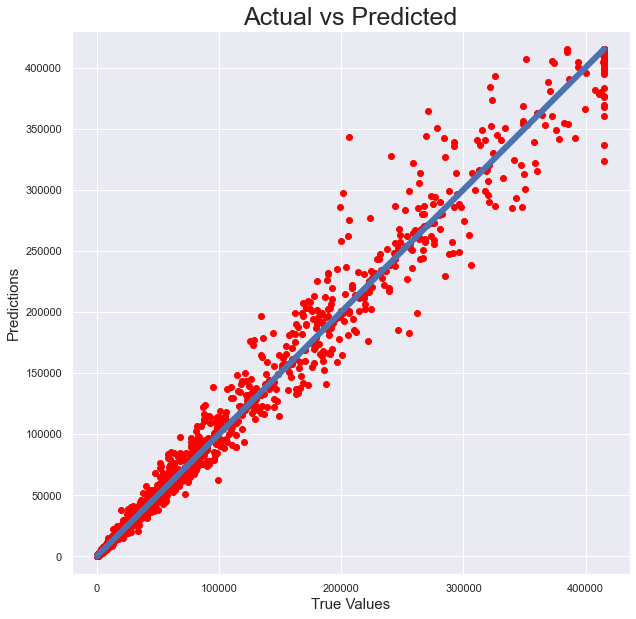

In [300]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='red')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-',lw=6)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Actual vs Predicted",fontsize=25)
plt.axis('equal')
plt.show()

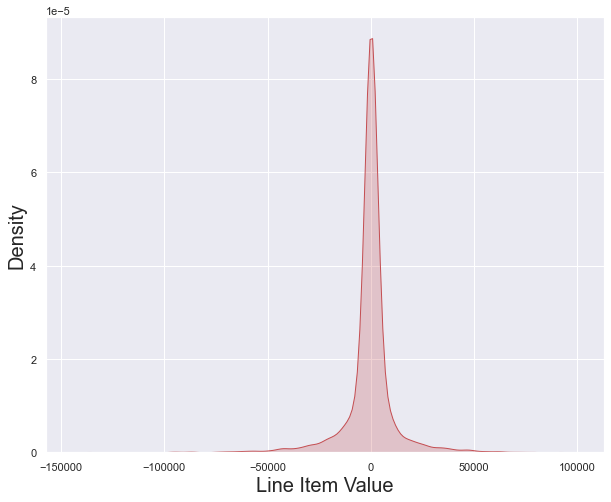

In [314]:
plt.figure(figsize=(10,8))
sns.kdeplot(residuals, color='r', shade=True)
plt.xlabel('Line Item Value',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

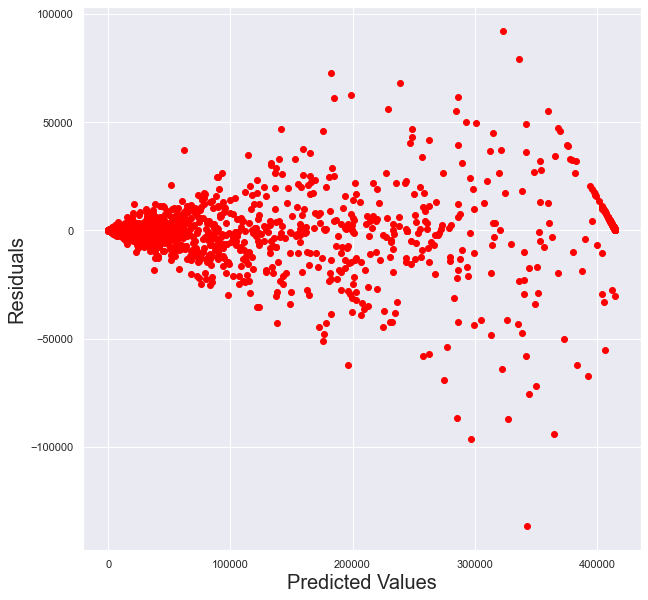

In [316]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_pred, residuals,c='red')
plt.xlabel('Predicted Values',fontsize=20)
plt.ylabel('Residuals',fontsize=20)
plt.show()

In [317]:
model = xg

In [333]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})    
data.head()

Actual      Predicted
5229   85072.68000   75385.671875
9867    8526.24000    7445.332031
6176  415260.32625  412289.156250
7541   45423.54000   39463.449219
1208   64595.20000   59318.933594

**Creating a Pickle File**

In [334]:
import pickle

In [335]:
pickle.dump(xg,open('xg.pkl','wb'))

In [336]:
pickled_model=pickle.load(open('xg.pkl','rb'))

In [367]:
pickled_model.predict(x_train)

array([  3747.667  , 415189.5    ,    978.16626, ...,   2842.6267 ,
        42486.41   ,   1082.3928 ], dtype=float32)

In [372]:
y_train.iloc[1]

415260.3262499999

In [369]:
result2=pickled_model.score(x_test,y_test)
print(np.round(result2*100,2))

99.09
